In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import warnings


In [3]:
import random
random.seed(0)

# Exploratory Data Analysis

In [4]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv('garments_worker_productivity.csv')

In [3]:
df.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [4]:
# there are a mix of categorical and numeric columns
# label column is actual productivity



In [5]:
df.shape

(1197, 15)

In [6]:
# there are 1197 observations and 15 features

In [7]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [8]:
# some columns require encoding as they are categorical

In [9]:
print(df.columns)

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


In [10]:
# Step 2: Summary statistics of numeric columns

In [11]:
df.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

In [12]:
# There are some missing values in wip
# columns wip,over_time,incentive,idle_time,idle_men may have outliers

In [13]:
df.isnull().sum()*100/df.shape[0]

date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

In [14]:
# 1197 rows in the dataset. 
# wip has 42 % missing values and it can be dropped
# Several columns are expected to have outliers as per the descriptive statistics
# date information can be dropped since it is already considered with quarter and day of the week

In [15]:
# Step 3: Value counts of category columns

In [16]:
df.select_dtypes(include='object').columns

Index(['date', 'quarter', 'department', 'day'], dtype='object')

In [17]:

df.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [18]:
# quarter 5 has less observations

In [19]:
df.department.value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [20]:
# have to merge the categories 'finishing ' and 'finishing'  to one 

In [21]:
df.day.value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [22]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [23]:
df['actual_productivity'].groupby([df['day']]).mean()

day
Monday       0.735488
Saturday     0.751929
Sunday       0.728604
Thursday     0.722641
Tuesday      0.742701
Wednesday    0.730462
Name: actual_productivity, dtype: float64

In [24]:
df['actual_productivity'].groupby([df['no_of_workers'],df['day']]).mean()

no_of_workers  day      
2.0            Saturday     0.971867
               Sunday       0.760833
               Thursday     0.580000
               Tuesday      0.951420
               Wednesday    0.870000
                              ...   
60.0           Saturday     0.667447
               Sunday       0.307501
               Thursday     0.521180
               Tuesday      0.775157
89.0           Wednesday    0.850411
Name: actual_productivity, Length: 223, dtype: float64

In [25]:
df.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [26]:
pd.crosstab(df.department,df.day,values=df.actual_productivity,aggfunc='mean')

day           Monday  Saturday    Sunday  Thursday   Tuesday  Wednesday
department                                                             
finishing   0.712026  0.690843  0.725270  0.728957  0.718827   0.747741
finishing   0.787850  0.826654  0.771552  0.750122  0.811395   0.731104
sweing      0.724169  0.734080  0.713549  0.710772  0.728115   0.722712

In [27]:
# Step 4: Data Visualization

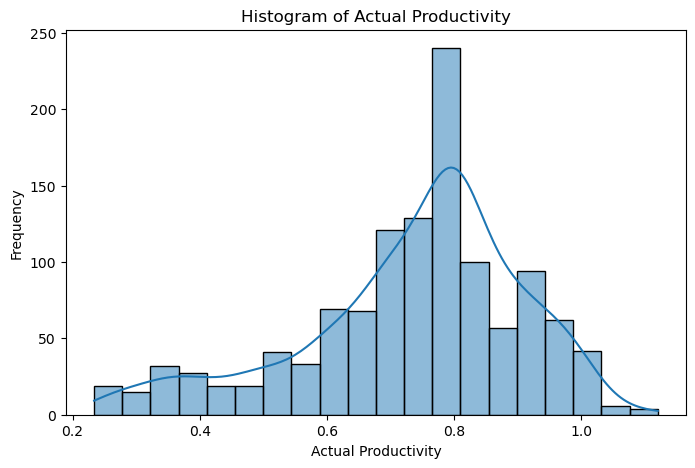

In [28]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['actual_productivity'], bins=20, kde=True)
plt.title('Histogram of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

In [29]:
# the actual productivity is normally distributed with mean around .8 and left skewed

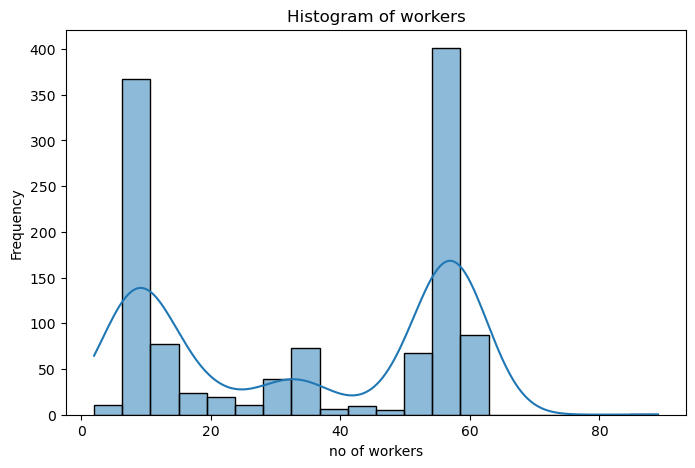

In [30]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['no_of_workers'], bins=20, kde=True)
plt.title('Histogram of workers')
plt.xlabel('no of workers')
plt.ylabel('Frequency')
plt.show()

In [31]:
# the distribution is bimodal with 2 peaks

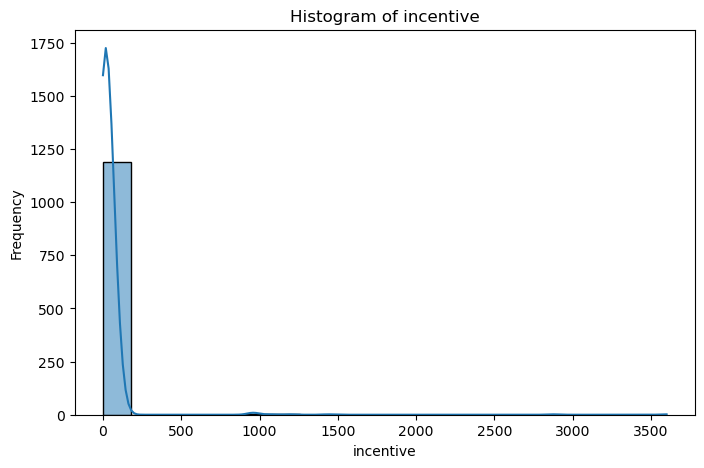

In [32]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['incentive'], bins=20, kde=True)
plt.title('Histogram of incentive')
plt.xlabel('incentive')
plt.ylabel('Frequency')
plt.show()

In [33]:
#there are a lot of outliers in incentive

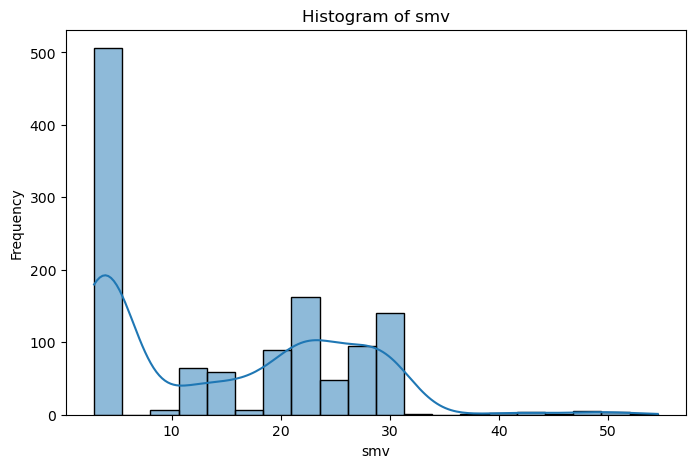

In [34]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['smv'], bins=20, kde=True)
plt.title('Histogram of smv')
plt.xlabel('smv')
plt.ylabel('Frequency')
plt.show()

In [35]:
# there may be outliers in upper end

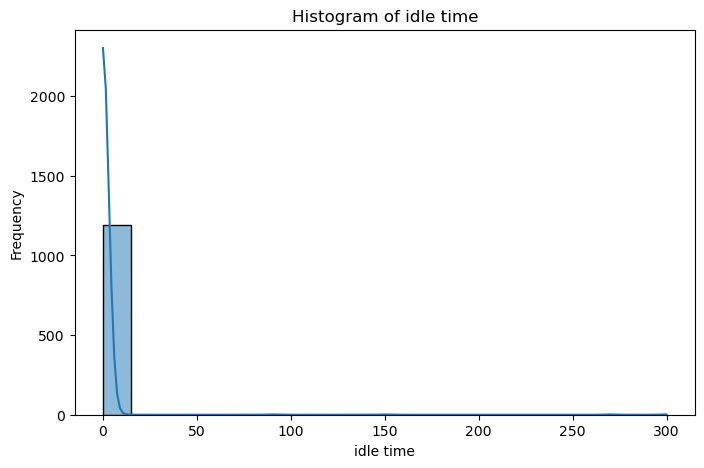

In [36]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['idle_time'], bins=20, kde=True)
plt.title('Histogram of idle time')
plt.xlabel('idle time')
plt.ylabel('Frequency')
plt.show()

In [37]:
# there may be outliers

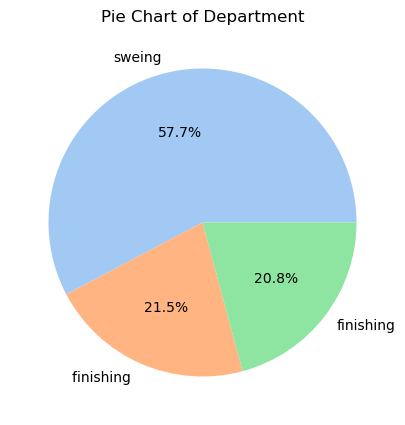

In [38]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['department'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Department')
plt.ylabel('')
plt.show()

In [39]:
#productivity is more in finishing dept
#both finishing department has to be merged

In [40]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['actual_productivity'])
plt.title('Box Plot of actual productivity')
plt.xlabel('actual productivity')
plt.show()

In [41]:
# shows some outliers in actual productivity column

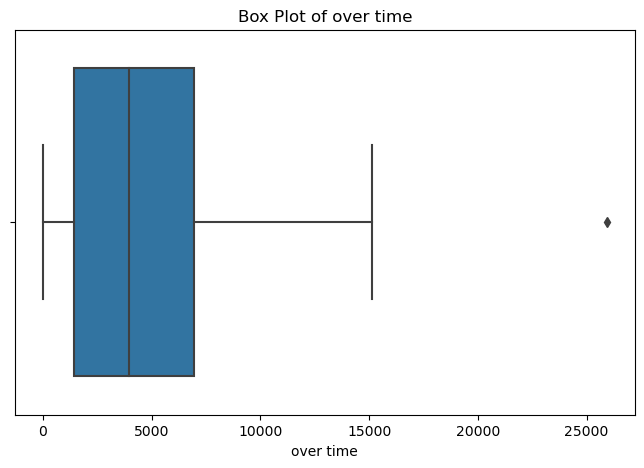

In [42]:

# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['over_time'])
plt.title('Box Plot of over time')
plt.xlabel('over time')
plt.show()

<Axes: xlabel='targeted_productivity', ylabel='actual_productivity'>

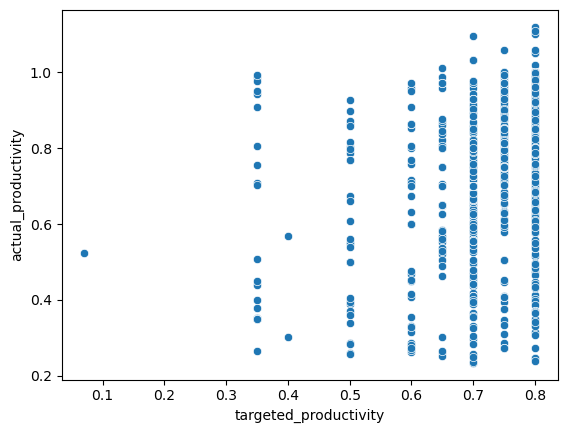

In [43]:
sns.scatterplot(x=df.targeted_productivity, y=df.actual_productivity)

<Axes: xlabel='incentive', ylabel='actual_productivity'>

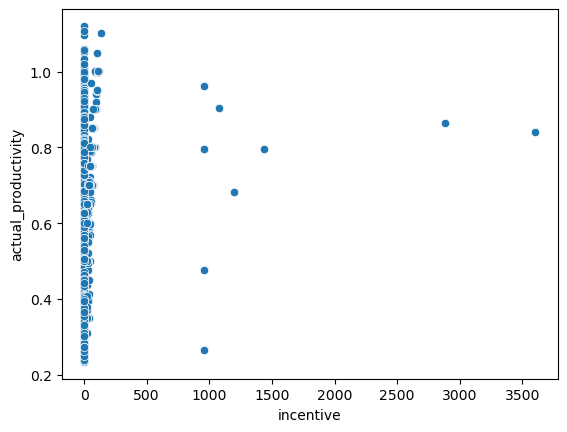

In [44]:
sns.scatterplot(x='incentive', y='actual_productivity', data=df)

<Axes: xlabel='over_time', ylabel='actual_productivity'>

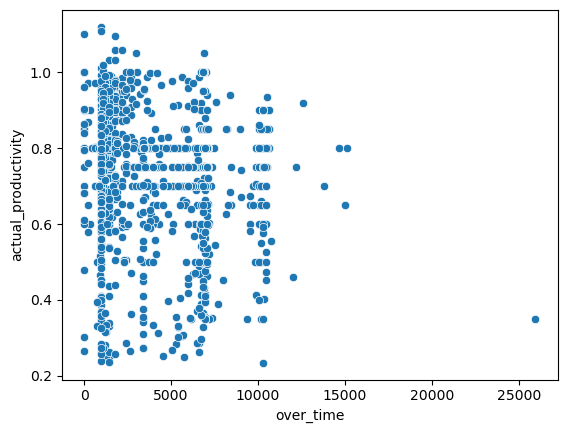

In [45]:
sns.scatterplot(x=df.over_time, y=df.actual_productivity)

In [46]:
# Step 5: Observations from data visualization
# - The date and wip columns has to be removed
# - Outliers require rows to be trimmed
# - actual_productivity seems to have a normal distribution with most values clustered around the mean.
# - Department is categorical with 3  values but 2 of them have to merged since only 2 distinct values are there


# Data Preprocessing

In [5]:
# Step 1: Remove ID columns - index and PatientID
df = df.drop(columns=['date', 'wip'])

In [6]:
df.shape

(1197, 13)

In [7]:
df.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [8]:
# Step 2: replace finishing  with finishing
df.replace(to_replace="finishing ", value="finishing", inplace=True)

In [51]:
df.department

0          sweing
1       finishing
2          sweing
3          sweing
4          sweing
          ...    
1192    finishing
1193    finishing
1194    finishing
1195    finishing
1196    finishing
Name: department, Length: 1197, dtype: object

In [52]:
df.shape

(1197, 13)

In [9]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()


team  targeted_productivity    smv  over_time  incentive  idle_time  \
0     8                   0.80  26.16       7080         98        0.0   
1     1                   0.75   3.94        960          0        0.0   
2    11                   0.80  11.41       3660         50        0.0   
3    12                   0.80  11.41       3660         50        0.0   
4     6                   0.80  25.90       1920         50        0.0   

   idle_men  no_of_style_change  no_of_workers  actual_productivity  
0         0                   0           59.0             0.940725  
1         0                   0            8.0             0.886500  
2         0                   0           30.5             0.800570  
3         0                   0           30.5             0.800570  
4         0                   0           56.0             0.800382

In [10]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
    return df


In [11]:
df = outlier_remover(df_num,df)

In [12]:
df.shape

(945, 13)

<Axes: xlabel='actual_productivity'>

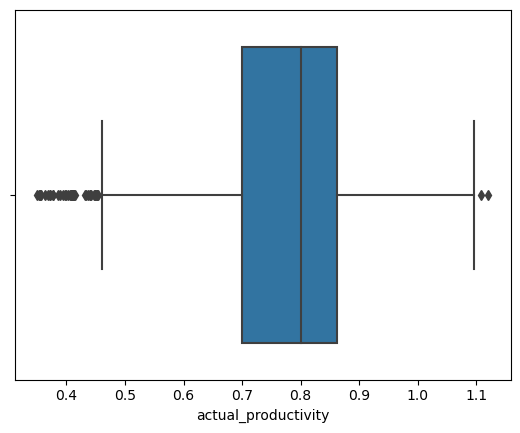

In [13]:
sns.boxplot(x=df['actual_productivity'])

In [14]:
df_num = df.select_dtypes(include='number')
df = outlier_remover(df_num,df)

<Axes: xlabel='actual_productivity'>

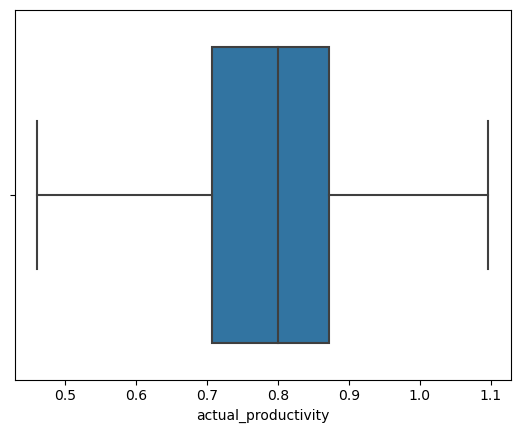

In [15]:
sns.boxplot(x=df['actual_productivity'])

In [16]:
df.shape

(898, 13)

In [17]:
X = df.drop('actual_productivity', axis=1)
y = df.actual_productivity
X.head()

quarter department       day  team  targeted_productivity    smv  \
0  Quarter1     sweing  Thursday     8                   0.80  26.16   
1  Quarter1  finishing  Thursday     1                   0.75   3.94   
2  Quarter1     sweing  Thursday    11                   0.80  11.41   
3  Quarter1     sweing  Thursday    12                   0.80  11.41   
4  Quarter1     sweing  Thursday     6                   0.80  25.90   

   over_time  incentive  idle_time  idle_men  no_of_style_change  \
0       7080         98        0.0         0                   0   
1        960          0        0.0         0                   0   
2       3660         50        0.0         0                   0   
3       3660         50        0.0         0                   0   
4       1920         50        0.0         0                   0   

   no_of_workers  
0           59.0  
1            8.0  
2           30.5  
3           30.5  
4           56.0

In [18]:
X_num = X.select_dtypes('number')
X_num.head()

team  targeted_productivity    smv  over_time  incentive  idle_time  \
0     8                   0.80  26.16       7080         98        0.0   
1     1                   0.75   3.94        960          0        0.0   
2    11                   0.80  11.41       3660         50        0.0   
3    12                   0.80  11.41       3660         50        0.0   
4     6                   0.80  25.90       1920         50        0.0   

   idle_men  no_of_style_change  no_of_workers  
0         0                   0           59.0  
1         0                   0            8.0  
2         0                   0           30.5  
3         0                   0           30.5  
4         0                   0           56.0

In [19]:
X_cat = X.select_dtypes('object')
X_cat.head()

quarter department       day
0  Quarter1     sweing  Thursday
1  Quarter1  finishing  Thursday
2  Quarter1     sweing  Thursday
3  Quarter1     sweing  Thursday
4  Quarter1     sweing  Thursday

In [20]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [21]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [22]:
X_num_scaled.describe()

team  targeted_productivity         smv   over_time   incentive  \
count  898.000000             898.000000  898.000000  898.000000  898.000000   
mean     0.495343               0.790646    0.236080    0.303949    0.242219   
std      0.326949               0.273334    0.222288    0.226984    0.272072   
min      0.000000               0.000000    0.000000    0.000000    0.000000   
25%      0.181818               0.500000    0.022638    0.095238    0.000000   
50%      0.454545               1.000000    0.189595    0.261905    0.193277   
75%      0.818182               1.000000    0.427079    0.460317    0.420168   
max      1.000000               1.000000    1.000000    1.000000    1.000000   

       idle_time  idle_men  no_of_style_change  no_of_workers  
count      898.0     898.0               898.0     898.000000  
mean         0.0       0.0                 0.0       0.351132  
std          0.0       0.0                 0.0       0.253041  
min          0.0       0.0                 0.0       0.000000  
25%          0.0       0.0                 0.0       0.080460  
50%          0.0       0.0                 0.0       0.344828  
75%          0.0       0.0                 0.0       0.632184  
max          0.0       0.0                 0.0       1.000000

In [23]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity

In [24]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [25]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((898, 22), (898, 9), (898, 13))

In [26]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
dtype: int64
0
(898, 22)
(898,)


In [27]:
X.describe()

team  targeted_productivity         smv   over_time   incentive  \
count  898.000000             898.000000  898.000000  898.000000  898.000000   
mean     0.495343               0.790646    0.236080    0.303949    0.242219   
std      0.326949               0.273334    0.222288    0.226984    0.272072   
min      0.000000               0.000000    0.000000    0.000000    0.000000   
25%      0.181818               0.500000    0.022638    0.095238    0.000000   
50%      0.454545               1.000000    0.189595    0.261905    0.193277   
75%      0.818182               1.000000    0.427079    0.460317    0.420168   
max      1.000000               1.000000    1.000000    1.000000    1.000000   

       idle_time  idle_men  no_of_style_change  no_of_workers  \
count      898.0     898.0               898.0     898.000000   
mean         0.0       0.0                 0.0       0.351132   
std          0.0       0.0                 0.0       0.253041   
min          0.0       0.0                 0.0       0.000000   
25%          0.0       0.0                 0.0       0.080460   
50%          0.0       0.0                 0.0       0.344828   
75%          0.0       0.0                 0.0       0.632184   
max          0.0       0.0                 0.0       1.000000   

       quarter_Quarter1  ...  quarter_Quarter4  quarter_Quarter5  \
count        898.000000  ...        898.000000        898.000000   
mean           0.353007  ...          0.170379          0.043430   
std            0.478171  ...          0.376175          0.203936   
min            0.000000  ...          0.000000          0.000000   
25%            0.000000  ...          0.000000          0.000000   
50%            0.000000  ...          0.000000          0.000000   
75%            1.000000  ...          0.000000          0.000000   
max            1.000000  ...          1.000000          1.000000   

       department_finishing  department_sweing  day_Monday  day_Saturday  \
count            898.000000         898.000000  898.000000    898.000000   
mean               0.461024           0.538976    0.160356      0.162584   
std                0.498756           0.498756    0.367141      0.369191   
min                0.000000           0.000000    0.000000      0.000000   
25%                0.000000           0.000000    0.000000      0.000000   
50%                0.000000           1.000000    0.000000      0.000000   
75%                1.000000           1.000000    0.000000      0.000000   
max                1.000000           1.000000    1.000000      1.000000   

       day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  
count  898.000000    898.000000   898.000000     898.000000  
mean     0.171492      0.164811     0.172606       0.168151  
std      0.377149      0.371216     0.378117       0.374209  
min      0.000000      0.000000     0.000000       0.000000  
25%      0.000000      0.000000     0.000000       0.000000  
50%      0.000000      0.000000     0.000000       0.000000  
75%      0.000000      0.000000     0.000000       0.000000  
max      1.000000      1.000000     1.000000       1.000000  

[8 rows x 22 columns]

In [28]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(718, 22)
(180, 22)
(718,)
(180,)


In [74]:
# Step 9: Observations after preprocessing
# - Date and wip columns have been removed.
# - Inconsistency in Department categories has been rectified
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

# Linear Regression

In [37]:
df.select_dtypes(include='number').columns

Index(['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

In [51]:
vifdf=pd.DataFrame()
model=LinearRegression()
for col in df.select_dtypes(include='number').columns:
    ylabel=df[col]
    feature=df.select_dtypes(include='number').drop(columns=[col])
    model.fit(feature,ylabel)
    rsq=model.score(feature,ylabel)
    vif=1-(1/(rsq**2))
    vifdf=vifdf.append({'column':col,'vif':vif},ignore_index=True)
   
    
    

C:\Users\admin\AppData\Local\Temp\ipykernel_14352\4069593795.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vifdf=vifdf.append({'column':col,'vif':vif},ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14352\4069593795.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vifdf=vifdf.append({'column':col,'vif':vif},ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14352\4069593795.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vifdf=vifdf.append({'column':col,'vif':vif},ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14352\4069593795.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vif

In [53]:
vifdf
#.sort_values(by='vif',ascending=False)

column         vif
0                   team -249.462955
1  targeted_productivity  -30.711089
2                    smv   -0.323374
3              over_time   -1.641360
4              incentive   -0.919697
5              idle_time    0.000000
6               idle_men    0.000000
7     no_of_style_change    0.000000
8          no_of_workers   -0.200470
9    actual_productivity  -13.192841

In [33]:
lm=LinearRegression()
model=lm.fit(X_train[['no_of_workers']],y_train)


In [40]:
model.intercept_,model.coef_

(0.8005249118503629, array([-0.02153639]))

In [42]:
y_pred = model.predict(X_train[['no_of_workers']])

In [44]:
#r square from model
model.score(X_train[['no_of_workers']],y_train)

0.0020005755958192317

In [46]:
sse = sum((y_train-y_pred)**2)
sse

10.549394345749887

In [48]:
ssr = sum((y_pred-np.mean(y_train))**2)
ssr

0.021147167385773664

In [50]:
sst =sum((y_train-np.mean(y_train))**2)
sst

10.570541513135684

In [51]:
r_square = ssr/sst

In [52]:
r_square

0.002000575595819262

In [53]:
y_test_pred = model.predict(X_test[['no_of_workers']])

In [54]:
train_mse = np.mean((y_train-y_pred)**2)

In [55]:
test_mse =np.mean((y_test-y_test_pred)**2)

In [56]:
train_mse,test_mse

(0.014692749785167006, 0.013112771220868647)

In [57]:
model_slr_MAPE_train = np.mean((abs(y_train - y_pred)/y_train)*100)
model_slr_MAPE_test = np.mean((abs(y_test - y_test_pred)/y_test)*100)

In [58]:
model_slr_performance = {'model':"model_slr",'R Sq':r_square,'train_MSE':train_mse,'test_MSE':test_mse,'train_MAPE':model_slr_MAPE_train,'test_MAPE':model_slr_MAPE_test}

In [61]:
type(model_slr_performance)

dict

In [60]:
df_snap = pd.DataFrame(columns=['model','R Sq','train_MSE','test_MSE','train_MAPE','test_MAPE'])
df_snap

Empty DataFrame
Columns: [model, R Sq, train_MSE, test_MSE, train_MAPE, test_MAPE]
Index: []

In [63]:
df_snap = df_snap.append(model_slr_performance,ignore_index=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_11284\510859929.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_snap = df_snap.append(model_slr_performance,ignore_index=True)


In [64]:
df_snap

model      R Sq  train_MSE  test_MSE  train_MAPE  test_MAPE
0  model_slr  0.002001   0.014693  0.013113   12.804304  11.860443

In [ ]:
#viz

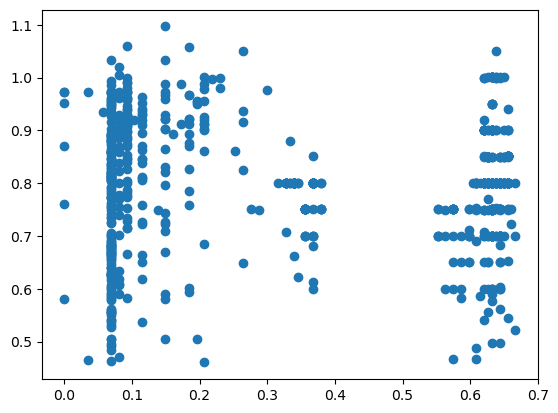

In [65]:
plt.scatter(X_train[['no_of_workers']],y_train)

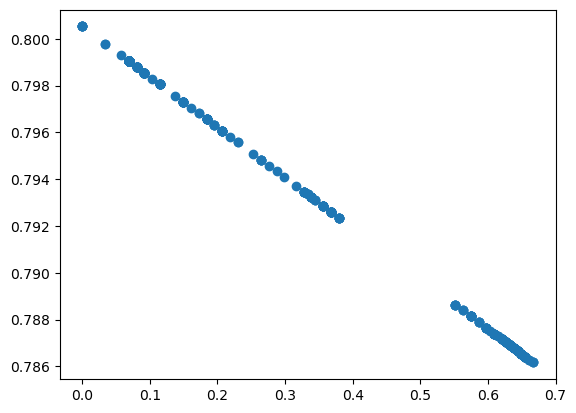

In [66]:
plt.scatter(X_train[['no_of_workers']],y_pred)

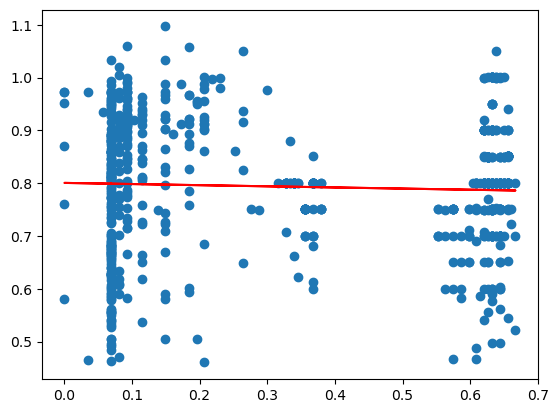

In [70]:
plt.scatter(X_train[['no_of_workers']],y_train);
plt.plot(X_train[['no_of_workers']],y_pred,'r');
plt.show()

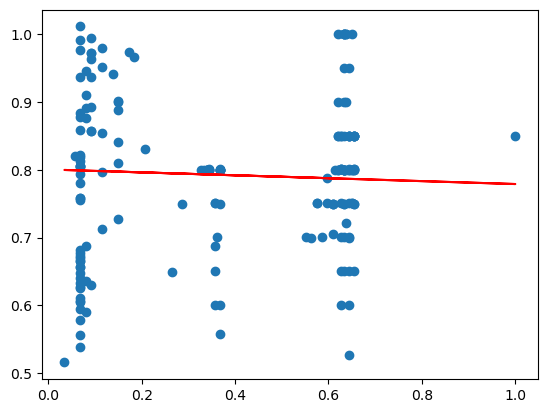

In [71]:
# how well is the line explaining test data
plt.scatter(X_test[['no_of_workers']],y_test);
plt.plot(X_test[['no_of_workers']],y_test_pred,'r');
plt.show()

# Data Set -2

# Exploratory Data Analysis

In [75]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv('car.csv')

In [76]:
df.head()

Unnamed: 0   Manuf Model                         Desc  Engine_Capacity  \
0           0  ABARTH   595  595 1.4 145 BHP Convertible             1368   
1           1  ABARTH   595  595 1.4 145 BHP Convertible             1368   
2           2  ABARTH   595    595 1.4 145 BHP Hatchback             1368   
3           3  ABARTH   595    595 1.4 145 BHP Hatchback             1368   
4           4  ABARTH   595          595 1.4 TJET 145bhp             1368   

  Fuel_Type                        Powertrain Euro_Standard  \
0    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
1    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
2    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
3    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
4    Petrol  Internal Combustion Engine (ICE)       Euro 6d   

   Diesel_VED_Supplement Fuel_Cost Electric_Cost Total_Cost  Noise_Level  
0                  False    £1,935            £0     £1,935         73.5  
1                  False    £2,043            £0     £2,043         73.5  
2                  False    £1,935            £0     £1,935         73.5  
3                  False    £2,043            £0     £2,043         73.5  
4                  False    £1,828            £0     £1,828         74.0

In [4]:
# there are a mix of categorical and numeric columns
# label column is Total_Cost
# columns Unnamed,Desc,Diesel_VED_Supplement may be removed

In [77]:
df.shape

(4625, 13)

In [78]:
# there are 4625 observations and 13 features

In [79]:
df.dtypes

Unnamed: 0                 int64
Manuf                     object
Model                     object
Desc                      object
Engine_Capacity            int64
Fuel_Type                 object
Powertrain                object
Euro_Standard             object
Diesel_VED_Supplement       bool
Fuel_Cost                 object
Electric_Cost             object
Total_Cost                object
Noise_Level              float64
dtype: object

In [8]:
# columns Electric_Cost,Total_Cost,Fuel_Cost has to be converted to float
# some columns require encoding as they are categorical

In [9]:
# Converting columns Electric_Cost,Total_Cost,Fuel_Cost  to float in eda itself as it is important for eda of these columns

In [80]:
df['Electric_Cost'] = pd.to_numeric(df['Electric_Cost'].astype(str).str.replace('£', '').str.replace(',', ''), errors='coerce')
df['Total_Cost'] = pd.to_numeric(df['Total_Cost'].astype(str).str.replace('£', '').str.replace(',', ''), errors='coerce')
df['Fuel_Cost'] = pd.to_numeric(df['Fuel_Cost'].astype(str).str.replace('£', '').str.replace(',', ''), errors='coerce')

In [81]:
df.head()

Unnamed: 0   Manuf Model                         Desc  Engine_Capacity  \
0           0  ABARTH   595  595 1.4 145 BHP Convertible             1368   
1           1  ABARTH   595  595 1.4 145 BHP Convertible             1368   
2           2  ABARTH   595    595 1.4 145 BHP Hatchback             1368   
3           3  ABARTH   595    595 1.4 145 BHP Hatchback             1368   
4           4  ABARTH   595          595 1.4 TJET 145bhp             1368   

  Fuel_Type                        Powertrain Euro_Standard  \
0    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
1    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
2    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
3    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
4    Petrol  Internal Combustion Engine (ICE)       Euro 6d   

   Diesel_VED_Supplement  Fuel_Cost  Electric_Cost  Total_Cost  Noise_Level  
0                  False       1935              0        1935         73.5  
1                  False       2043              0        2043         73.5  
2                  False       1935              0        1935         73.5  
3                  False       2043              0        2043         73.5  
4                  False       1828              0        1828         74.0

In [82]:
df.dtypes

Unnamed: 0                 int64
Manuf                     object
Model                     object
Desc                      object
Engine_Capacity            int64
Fuel_Type                 object
Powertrain                object
Euro_Standard             object
Diesel_VED_Supplement       bool
Fuel_Cost                  int64
Electric_Cost              int64
Total_Cost                 int64
Noise_Level              float64
dtype: object

In [83]:
print(df.columns)

Index(['Unnamed: 0', 'Manuf', 'Model', 'Desc', 'Engine_Capacity', 'Fuel_Type',
       'Powertrain', 'Euro_Standard', 'Diesel_VED_Supplement', 'Fuel_Cost',
       'Electric_Cost', 'Total_Cost', 'Noise_Level'],
      dtype='object')


In [15]:
# Step 2: Summary statistics of numeric columns

In [84]:
df.head()

Unnamed: 0   Manuf Model                         Desc  Engine_Capacity  \
0           0  ABARTH   595  595 1.4 145 BHP Convertible             1368   
1           1  ABARTH   595  595 1.4 145 BHP Convertible             1368   
2           2  ABARTH   595    595 1.4 145 BHP Hatchback             1368   
3           3  ABARTH   595    595 1.4 145 BHP Hatchback             1368   
4           4  ABARTH   595          595 1.4 TJET 145bhp             1368   

  Fuel_Type                        Powertrain Euro_Standard  \
0    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
1    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
2    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
3    Petrol  Internal Combustion Engine (ICE)  Euro 6d-TEMP   
4    Petrol  Internal Combustion Engine (ICE)       Euro 6d   

   Diesel_VED_Supplement  Fuel_Cost  Electric_Cost  Total_Cost  Noise_Level  
0                  False       1935              0        1935         73.5  
1                  False       2043              0        2043         73.5  
2                  False       1935              0        1935         73.5  
3                  False       2043              0        2043         73.5  
4                  False       1828              0        1828         74.0

In [85]:
df.describe()

Unnamed: 0  Engine_Capacity    Fuel_Cost  Electric_Cost   Total_Cost  \
count  4625.000000      4625.000000  4625.000000    4625.000000  4625.000000   
mean   2312.000000      1706.910270  1721.316541      67.032649  1788.346595   
std    1335.266827       916.609954   711.430744     233.811409   598.873474   
min       0.000000         0.000000     0.000000       0.000000   586.000000   
25%    1156.000000      1199.000000  1424.000000       0.000000  1424.000000   
50%    2312.000000      1499.000000  1666.000000       0.000000  1680.000000   
75%    3468.000000      1997.000000  1989.000000       0.000000  1999.000000   
max    4624.000000      6749.000000  4488.000000    1748.000000  4488.000000   

       Noise_Level  
count  4625.000000  
mean     65.141492  
std      15.319174  
min       0.000000  
25%      67.000000  
50%      68.000000  
75%      69.000000  
max      89.200000

In [17]:

# columns Engine_Capacity,Fuel_Cost,Electric_Cost,Total_Cost may have outliers

In [86]:
df.isnull().sum()*100/df.shape[0]

Unnamed: 0               0.0
Manuf                    0.0
Model                    0.0
Desc                     0.0
Engine_Capacity          0.0
Fuel_Type                0.0
Powertrain               0.0
Euro_Standard            0.0
Diesel_VED_Supplement    0.0
Fuel_Cost                0.0
Electric_Cost            0.0
Total_Cost               0.0
Noise_Level              0.0
dtype: float64

In [19]:
# There are no null missing values

In [20]:
# Step 3: Value counts of category columns

In [87]:
df.select_dtypes(include='object').columns

Index(['Manuf', 'Model', 'Desc', 'Fuel_Type', 'Powertrain', 'Euro_Standard'], dtype='object')

In [88]:
df.select_dtypes(include='object').describe()

Manuf   Model         Desc Fuel_Type  \
count      4625    4625         4625      4625   
unique       41     324         2218         8   
top     RENAULT  Captur  2.0 EcoBlue    Petrol   
freq        934     210           81      2308   

                              Powertrain Euro_Standard  
count                               4625          4625  
unique                                 6             4  
top     Internal Combustion Engine (ICE)       Euro 6d  
freq                                3344          2945

In [89]:

df.Manuf.value_counts()

RENAULT                 934
DACIA                   410
TOYOTA                  354
FORD                    322
HONDA                   294
MERCEDES-BENZ           292
LAND ROVER              289
MAZDA                   217
SEAT                    187
PEUGEOT                 142
KIA                     136
FIAT                    111
JAGUAR                  105
LEXUS                   105
CITROEN                  98
HYUNDAI                  94
CHRYSLER JEEP            62
VOLVO                    53
NISSAN                   50
GENESIS                  44
ABARTH                   42
ALPINE                   34
SUZUKI                   32
MASERATI                 31
MG MOTORS UK             25
ALFA ROMEO               25
Rolls Royce              21
SSANGYONG                19
FERRARI                  16
ASTON MARTIN LAGONDA     13
TESLA                    12
McLaren                  11
SUBARU                    9
BENTLEY MOTORS            9
LOTUS                     9
SMART               

In [90]:
df.Manuf.value_counts()*100/len(df)

RENAULT                 20.194595
DACIA                    8.864865
TOYOTA                   7.654054
FORD                     6.962162
HONDA                    6.356757
MERCEDES-BENZ            6.313514
LAND ROVER               6.248649
MAZDA                    4.691892
SEAT                     4.043243
PEUGEOT                  3.070270
KIA                      2.940541
FIAT                     2.400000
JAGUAR                   2.270270
LEXUS                    2.270270
CITROEN                  2.118919
HYUNDAI                  2.032432
CHRYSLER JEEP            1.340541
VOLVO                    1.145946
NISSAN                   1.081081
GENESIS                  0.951351
ABARTH                   0.908108
ALPINE                   0.735135
SUZUKI                   0.691892
MASERATI                 0.670270
MG MOTORS UK             0.540541
ALFA ROMEO               0.540541
Rolls Royce              0.454054
SSANGYONG                0.410811
FERRARI                  0.345946
ASTON MARTIN L

In [25]:
# There are lot of unique values, all the Manuf with rows less than 1% may be removed

In [91]:
df.Model.value_counts()

Captur                                            210
Duster                                            208
Clio                                              202
Kadjar                                            112
Mégane Hatch                                       82
Defender, 20MY                                     80
CR-V 2021                                          79
Mazda CX-5                                         79
Civic 2021                                         73
Sandero Stepway                                    66
Logan MCV                                          66
CR-V Hybrid 2022                                   65
Trafic Passenger                                   62
Sandero                                            62
Range Rover Sport, 20MY                            58
Mégane Sport Tourer                                52
New Zoe                                            50
500                                                48
Arkana                      

In [27]:
df.Model.value_counts()*100/len(df)

Captur                4.540541
Duster                4.497297
Clio                  4.367568
Kadjar                2.421622
Mégane Hatch          1.772973
                        ...   
Swift Sport           0.021622
Flying Spur MY22.5    0.021622
Highlander            0.021622
540C                  0.021622
Soul EV MY22          0.021622
Name: Model, Length: 324, dtype: float64

In [28]:
# column Model to be dropped 

In [29]:
pd.set_option('display.max_rows', None)

In [92]:
df.Fuel_Type.value_counts()

Petrol                  2308
Diesel                  1066
Petrol Electric          748
Electricity              239
Electricity / Petrol     122
Diesel Electric           70
Petrol / LPG              62
Electricity / Diesel      10
Name: Fuel_Type, dtype: int64

In [93]:
df.Powertrain.value_counts()

Internal Combustion Engine (ICE)          3344
Hybrid Electric Vehicle (HEV)              557
Mild Hybrid Electric Vehicle (MHEV)        341
Battery Electric Vehicle (BEV)             239
Plug-in Hybrid Electric Vehicle (PHEV)     132
Micro-hybrid                                12
Name: Powertrain, dtype: int64

In [94]:
df.Euro_Standard.value_counts()

Euro 6d                        2945
Euro 6d-TEMP                   1299
Euro 6-WLTP (for BEVs only)     239
Euro 6c                         142
Name: Euro_Standard, dtype: int64

In [95]:
df.columns

Index(['Unnamed: 0', 'Manuf', 'Model', 'Desc', 'Engine_Capacity', 'Fuel_Type',
       'Powertrain', 'Euro_Standard', 'Diesel_VED_Supplement', 'Fuel_Cost',
       'Electric_Cost', 'Total_Cost', 'Noise_Level'],
      dtype='object')

In [34]:
# Step 4: Data Visualization

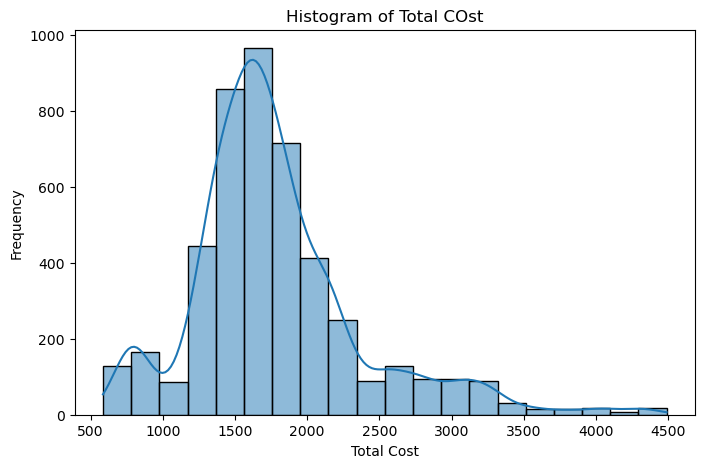

In [96]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Total_Cost'], bins=20, kde=True)
plt.title('Histogram of Total COst')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

In [36]:
# there may be lot of upper end outliers in Total Cost and it forms a uniform distribution

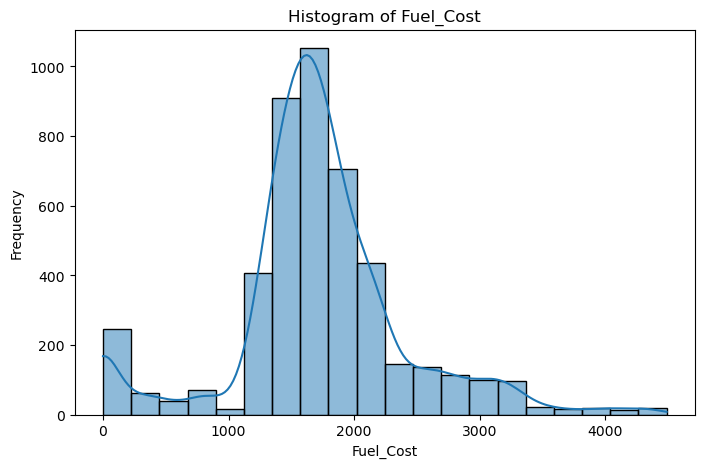

In [97]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Fuel_Cost'], bins=20, kde=True)
plt.title('Histogram of Fuel_Cost')
plt.xlabel('Fuel_Cost')
plt.ylabel('Frequency')
plt.show()

In [38]:
# there may be  outliers in Fuel Cost

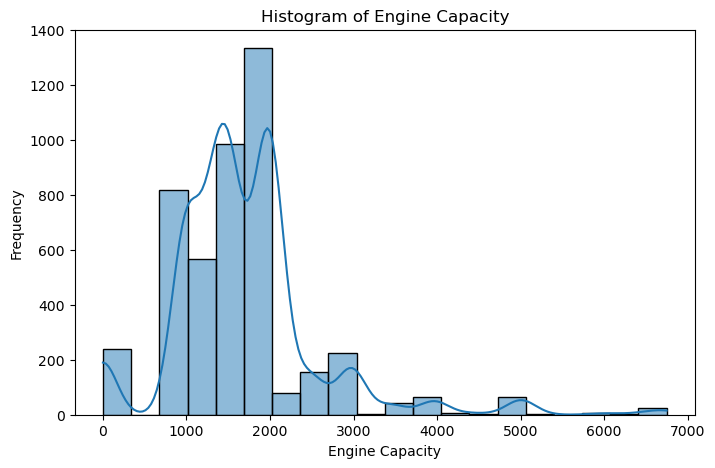

In [98]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Engine_Capacity'], bins=20, kde=True)
plt.title('Histogram of Engine Capacity')
plt.xlabel('Engine Capacity')
plt.ylabel('Frequency')
plt.show()

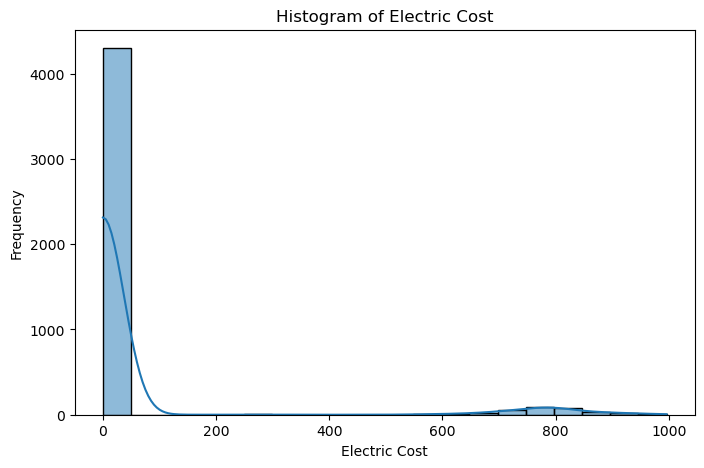

In [40]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Electric_Cost'], bins=20, kde=True)
plt.title('Histogram of Electric Cost')
plt.xlabel('Electric Cost')
plt.ylabel('Frequency')
plt.show()

In [41]:
# there may be outliers in upper end

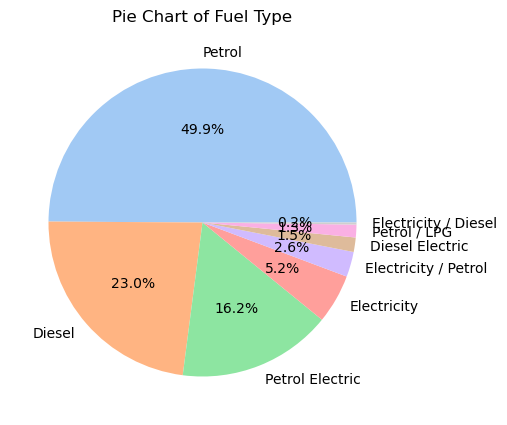

In [100]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Fuel_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Fuel Type')
plt.ylabel('')
plt.show()

In [44]:
# sub categories are not equally distributed

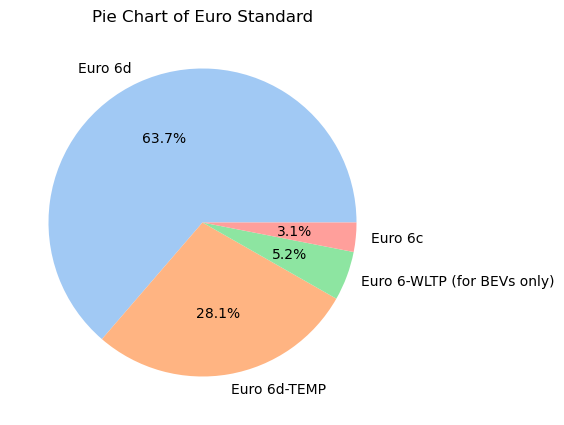

In [101]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Euro_Standard'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Euro Standard')
plt.ylabel('')
plt.show()

In [46]:
# Euro standards is not equally distributed

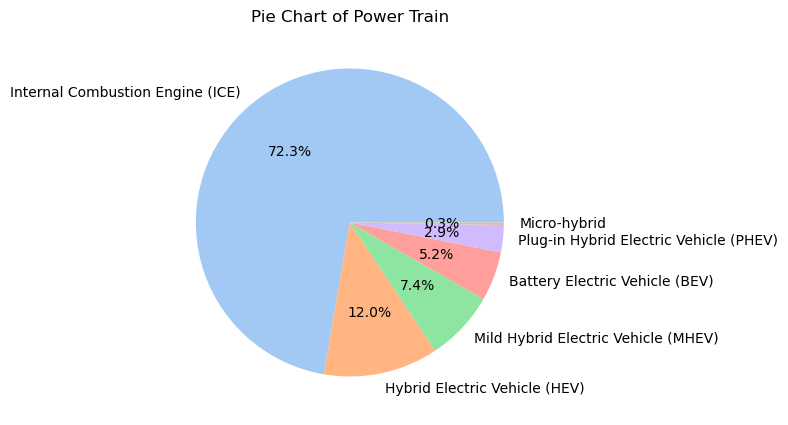

In [102]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Powertrain'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Power Train')
plt.ylabel('')
plt.show()

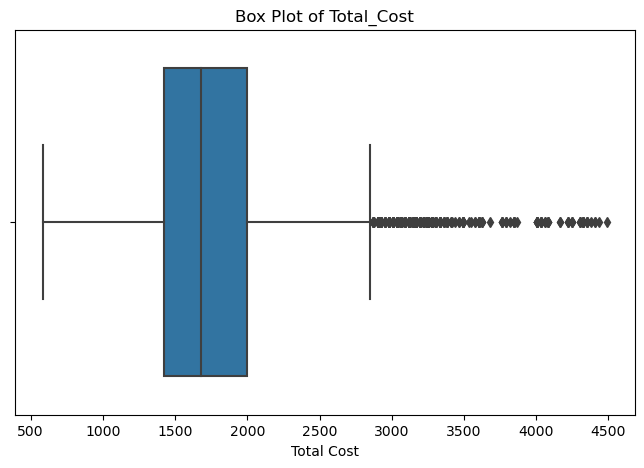

In [103]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total_Cost'])
plt.title('Box Plot of Total_Cost')
plt.xlabel('Total Cost')
plt.show()

In [50]:
# there are outliers in total cost column

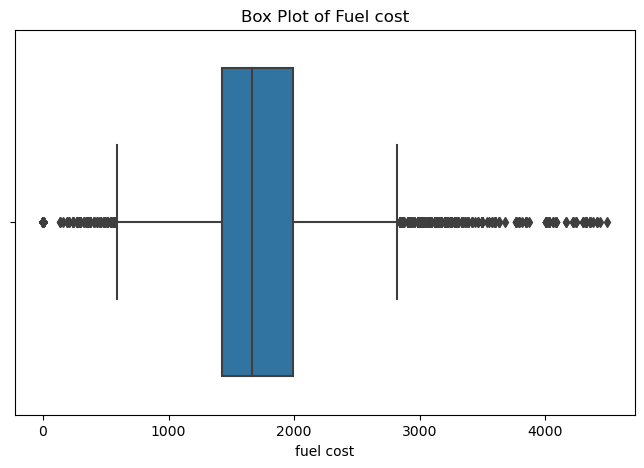

In [104]:

# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Fuel_Cost'])
plt.title('Box Plot of Fuel cost')
plt.xlabel('fuel cost')
plt.show()

<Axes: xlabel='Fuel_Cost', ylabel='Total_Cost'>

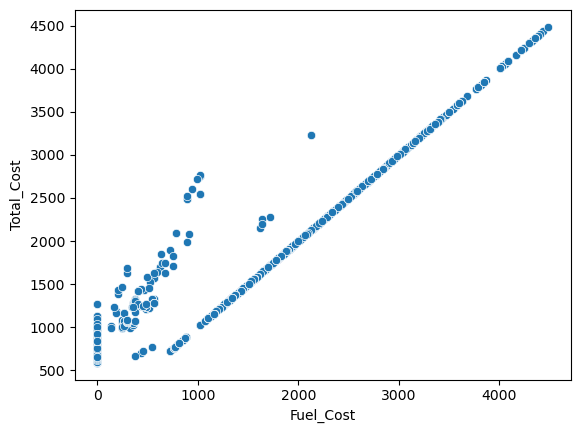

In [105]:
sns.scatterplot(x=df.Fuel_Cost, y=df.Total_Cost)

In [ ]:
# total cost seems to be incrasing with fuel cost

<Axes: xlabel='Engine_Capacity', ylabel='Total_Cost'>

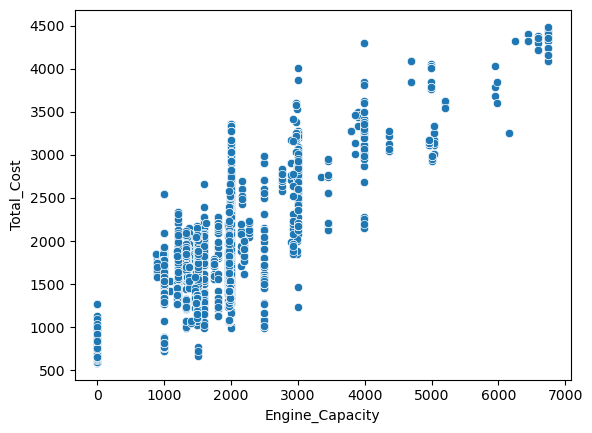

In [106]:
sns.scatterplot(x=df.Engine_Capacity, y=df.Total_Cost)

In [ ]:
# Step 5: Observations from data visualization
# - The Unnamed,Desc,Diesel_VED_Supplement,model columns has to be removed
# - Outliers require rows to be trimmed
# - all the Manuf with rows less than 1% may be removed



# Data Preprocessing

In [107]:
# Step 1: Remove columns - Unnamed,Desc,Diesel_VED_Supplement
df = df.drop(columns=['Unnamed: 0', 'Diesel_VED_Supplement','Desc','Model'])

In [108]:
df.shape

(4625, 9)

In [109]:
# Step 2: remove less frequent manufacturers from the dataframe
common_manufacturers = df['Manuf'].value_counts() * 100 / len(df) > 1
df = df[df['Manuf'].isin(common_manufacturers[common_manufacturers].index)]

In [110]:
df.shape

(4255, 9)

In [111]:
df.Manuf.value_counts()

RENAULT          934
DACIA            410
TOYOTA           354
FORD             322
HONDA            294
MERCEDES-BENZ    292
LAND ROVER       289
MAZDA            217
SEAT             187
PEUGEOT          142
KIA              136
FIAT             111
JAGUAR           105
LEXUS            105
CITROEN           98
HYUNDAI           94
CHRYSLER JEEP     62
VOLVO             53
NISSAN            50
Name: Manuf, dtype: int64

In [112]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()

Engine_Capacity  Fuel_Cost  Electric_Cost  Total_Cost  Noise_Level
128             1332       1801              0        1801         70.0
129             1332       1935              0        1935         70.0
130             1469       1532              0        1532         68.0
131             1469       1639              0        1639         68.0
132             1332       1801              0        1801         70.0

In [113]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
    return df


In [114]:
df = outlier_remover(df_num,df)

In [115]:
df.shape

(3140, 9)

<Axes: xlabel='Total_Cost'>

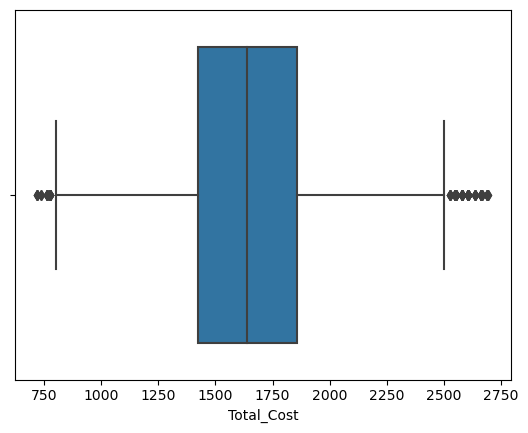

In [116]:
sns.boxplot(x=df['Total_Cost'])

In [117]:
df_num = df.select_dtypes(include='number')
df = outlier_remover(df_num,df)

<Axes: xlabel='Total_Cost'>

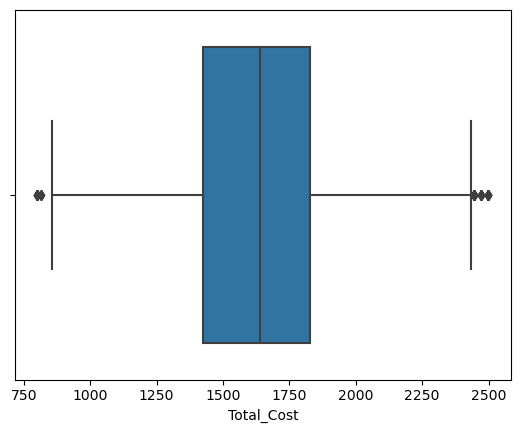

In [118]:
sns.boxplot(x=df['Total_Cost'])

In [119]:
df.shape

(3010, 9)

In [120]:
X = df.drop('Total_Cost', axis=1)
y = df.Total_Cost
X.head()

Manuf  Engine_Capacity        Fuel_Type  \
128  CHRYSLER JEEP             1332           Petrol   
129  CHRYSLER JEEP             1332           Petrol   
130  CHRYSLER JEEP             1469  Petrol Electric   
131  CHRYSLER JEEP             1469  Petrol Electric   
132  CHRYSLER JEEP             1332           Petrol   

                              Powertrain Euro_Standard  Fuel_Cost  \
128     Internal Combustion Engine (ICE)       Euro 6d       1801   
129     Internal Combustion Engine (ICE)       Euro 6d       1935   
130  Mild Hybrid Electric Vehicle (MHEV)       Euro 6d       1532   
131  Mild Hybrid Electric Vehicle (MHEV)       Euro 6d       1639   
132     Internal Combustion Engine (ICE)       Euro 6d       1801   

     Electric_Cost  Noise_Level  
128              0         70.0  
129              0         70.0  
130              0         68.0  
131              0         68.0  
132              0         70.0

In [121]:
X_num = X.select_dtypes('number')
X_num.head()

Engine_Capacity  Fuel_Cost  Electric_Cost  Noise_Level
128             1332       1801              0         70.0
129             1332       1935              0         70.0
130             1469       1532              0         68.0
131             1469       1639              0         68.0
132             1332       1801              0         70.0

In [122]:
X_cat = X.select_dtypes('object')
X_cat.head()

Manuf        Fuel_Type                           Powertrain  \
128  CHRYSLER JEEP           Petrol     Internal Combustion Engine (ICE)   
129  CHRYSLER JEEP           Petrol     Internal Combustion Engine (ICE)   
130  CHRYSLER JEEP  Petrol Electric  Mild Hybrid Electric Vehicle (MHEV)   
131  CHRYSLER JEEP  Petrol Electric  Mild Hybrid Electric Vehicle (MHEV)   
132  CHRYSLER JEEP           Petrol     Internal Combustion Engine (ICE)   

    Euro_Standard  
128       Euro 6d  
129       Euro 6d  
130       Euro 6d  
131       Euro 6d  
132       Euro 6d

In [123]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [124]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [125]:
X_num_scaled.describe()

Engine_Capacity    Fuel_Cost  Electric_Cost  Noise_Level
count      3010.000000  3010.000000         3010.0  3010.000000
mean          0.336304     0.507202            0.0     0.506831
std           0.210869     0.174366            0.0     0.191917
min           0.000000     0.000000            0.0     0.000000
25%           0.221951     0.366902            0.0     0.375000
50%           0.303902     0.493522            0.0     0.500000
75%           0.545366     0.604829            0.0     0.625000
max           1.000000     1.000000            0.0     1.000000

In [126]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  

In [127]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [128]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((3010, 33), (3010, 4), (3010, 29))

In [129]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
Engine_Capacity                                   0
Fuel_Cost                                         0
Electric_Cost                                     0
Noise_Level                                       0
Manuf_CHRYSLER JEEP                               0
Manuf_CITROEN                                     0
Manuf_DACIA                                       0
Manuf_FIAT                                        0
Manuf_FORD                                        0
Manuf_HONDA                                       0
Manuf_HYUNDAI                                     0
Manuf_JAGUAR                                      0
Manuf_KIA                                         0
Manuf_LAND ROVER                                  0
Manuf_LEXUS                                       0
Manuf_MAZDA                                       0
Manuf_MERCEDES-BENZ                               0
Manuf_PEUGEOT                                     0
Manuf_RENAULT 

In [130]:
X.describe()

Engine_Capacity    Fuel_Cost  Electric_Cost  Noise_Level  \
count      3010.000000  3010.000000         3010.0  3010.000000   
mean          0.336304     0.507202            0.0     0.506831   
std           0.210869     0.174366            0.0     0.191917   
min           0.000000     0.000000            0.0     0.000000   
25%           0.221951     0.366902            0.0     0.375000   
50%           0.303902     0.493522            0.0     0.500000   
75%           0.545366     0.604829            0.0     0.625000   
max           1.000000     1.000000            0.0     1.000000   

       Manuf_CHRYSLER JEEP  Manuf_CITROEN  Manuf_DACIA   Manuf_FIAT  \
count          3010.000000    3010.000000  3010.000000  3010.000000   
mean              0.009967       0.030565     0.116944     0.032558   
std               0.099351       0.172164     0.321406     0.177507   
min               0.000000       0.000000     0.000000     0.000000   
25%               0.000000       0.000000     0.000000     0.000000   
50%               0.000000       0.000000     0.000000     0.000000   
75%               0.000000       0.000000     0.000000     0.000000   
max               1.000000       1.000000     1.000000     1.000000   

        Manuf_FORD  Manuf_HONDA  ...  Fuel_Type_Petrol  \
count  3010.000000  3010.000000  ...       3010.000000   
mean      0.082392     0.097674  ...          0.515282   
std       0.275007     0.296923  ...          0.499849   
min       0.000000     0.000000  ...          0.000000   
25%       0.000000     0.000000  ...          0.000000   
50%       0.000000     0.000000  ...          1.000000   
75%       0.000000     0.000000  ...          1.000000   
max       1.000000     1.000000  ...          1.000000   

       Fuel_Type_Petrol / LPG  Fuel_Type_Petrol Electric  \
count             3010.000000                3010.000000   
mean                 0.012625                   0.197010   
std                  0.111666                   0.397806   
min                  0.000000                   0.000000   
25%                  0.000000                   0.000000   
50%                  0.000000                   0.000000   
75%                  0.000000                   0.000000   
max                  1.000000                   1.000000   

       Powertrain_Hybrid Electric Vehicle (HEV)  \
count                               3010.000000   
mean                                   0.157807   
std                                    0.364621   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       Powertrain_Internal Combustion Engine (ICE)  Powertrain_Micro-hybrid  \
count                                  3010.000000              3010.000000   
mean                                      0.757143                 0.003987   
std                                       0.428881                 0.063025   
min                                       0.000000                 0.000000   
25%                                       1.000000                 0.000000   
50%                                       1.000000                 0.000000   
75%                                       1.000000                 0.000000   
max                                       1.000000                 1.000000   

       Powertrain_Mild Hybrid Electric Vehicle (MHEV)  Euro_Standard_Euro 6c  \
count                                     3010.000000            3010.000000   
mean                                         0.081063               0.022591   
std                                          0.272977               0.148621   
min                                          0.000000               0.000000   
25%                                          0.000000               0.000000   
50%                                          0.

In [131]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(2408, 33)
(602, 33)
(2408,)
(602,)


In [ ]:
# Step 9: Observations after preprocessing
# -  Unnamed,Desc,Diesel_VED_Supplement columns have been removed.
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

# KNN Regression

In [ ]:
# Train the model with different K values and calculate MAPE scores using CV

In [133]:
def find_mape(y,y_pred):
    return np.mean(((np.abs(y-y_pred)/y)))

In [134]:
def test_holdout(k_list,X_train, X_test, y_train, y_test):
    train_mape_scores=[]
    test_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_train_pred = knn.predict(X_train)
        train_mape = find_mape(y_train, y_train_pred)
        train_mape_scores.append(train_mape)
        y_test_pred = knn.predict(X_test)
        test_mape = find_mape(y_test,y_test_pred)
        test_mape_scores.append(test_mape)
    best_k = k_list[np.argmin(test_mape_scores)]
    print("best k with holdout test is {0} and minimum test score is {1}".format(best_k,np.min(test_mape_scores)))
    return best_k,train_mape_scores,test_mape_scores

In [135]:
def cross_validation(X,y):
    cv_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        cv_scores = -cross_val_score(knn,X,y,cv=5,scoring='neg_mean_absolute_percentage_error')
        #print("for k = {}, cv_scores = {}".format(k,cv_scores))
        cv_mape = np.mean(cv_scores)
        cv_mape_scores.append(cv_mape)
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores

In [136]:
# user defined function for Cross Validation 
def custom_cross_validation(X,y,no_of_fold):
    warnings.filterwarnings('ignore', category=UserWarning)
    fold_size=len(X)//no_of_fold
    cv_mape_scores = []
    for k in k_list: 
        knn = KNeighborsRegressor(n_neighbors = k)
        scores = []
        for i in range(no_of_fold):
            start = i * fold_size
            end = (i + 1) * fold_size
            X_test_fold = X[start:end]
            y_test_fold = y[start:end]

            X_train_fold = np.concatenate([X[:start], X[end:]])
            y_train_fold = np.concatenate([y[:start], y[end:]])

            # Fit the model on the training data
            knn.fit(X_train_fold, y_train_fold)

            # Make predictions and calculate a custom score on the test data
            predictions = knn.predict(X_test_fold)
            custom_score = find_mape(predictions,y_test_fold)
            scores.append(custom_score)
        cv_mape_scores.append(np.mean(scores))
    
    # Calculate and return the average score
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with Custom cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores    
        
    

In [137]:
#validate_hold_out(X_train,X_test,y_train,y_test)
k_list=np.arange(1,10,2)
print("Starting test with Hold Out Data")
print("------------------------------------------")
best_k,train_mape_scores,test_mape_scores = test_holdout(k_list,X_train,X_test,y_train,y_test)
print("\n")
print("Starting test Cross-Validation")
print("------------------------------------------")
best_k_CV,cv_mape_scores= cross_validation(X,y)
print("\n")
print("Starting test with Custom Cross-Validation")
print("------------------------------------------")
best_k_CV_custom,cv_mape_scores_custom = custom_cross_validation( X, y, 5)


Starting test with Hold Out Data
------------------------------------------
best k with holdout test is 1 and minimum test score is 0.006549177479718273


Starting test Cross-Validation
------------------------------------------
best k with cross validation is 1 and minimum test score is 0.048755182742010184


Starting test with Custom Cross-Validation
------------------------------------------
best k with Custom cross validation is 1 and minimum test score is 0.047211479562315764


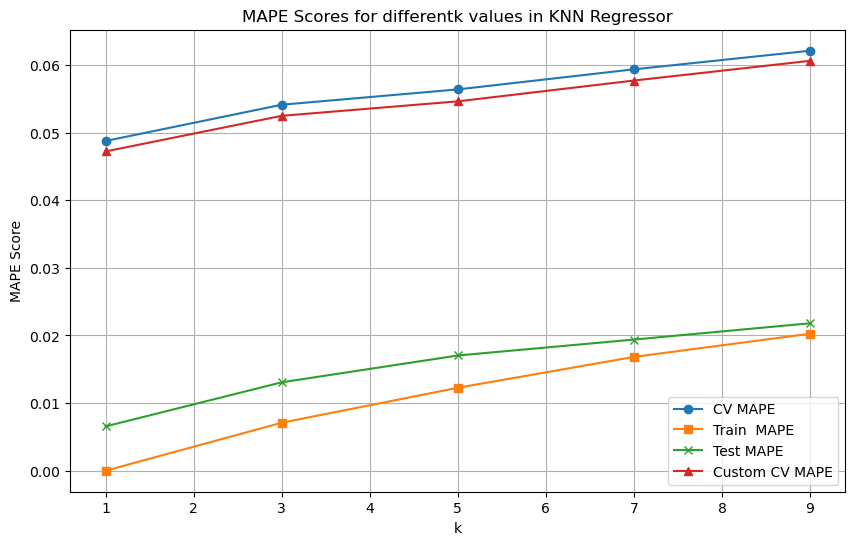

In [138]:
#plot CV MAPE, Train MAPE, Test MAPE for different values of K
plt.figure(figsize=(10,6))
plt.plot(k_list,cv_mape_scores,label='CV MAPE', marker='o')
plt.plot(k_list,train_mape_scores,label='Train  MAPE', marker='s')
plt.plot(k_list,test_mape_scores,label='Test MAPE', marker='x')
plt.plot(k_list,cv_mape_scores_custom,label='Custom CV MAPE', marker='^')
plt.xlabel('k')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for differentk values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()



### CUSTOM IMPLEMENTATION OF KNN

In [ ]:
# function to compute euclidean distance
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [ ]:
#custom function to implement KNN
def knn(X_train,X_test,y_train,k):
    mape_list = []
    y_pred_list = []
    
    for idx, test_row in X_test.iterrows():        
        distances = []
        for index,row in X_train.iterrows():
            distance = euclidean_distance(test_row,row)
            distances.append([distance,y_train[index]])
        distances.sort(key=lambda x: x[0])
        neighbors=distances[:k]
        target_values = np.take(np.array(neighbors),1,axis=1) #select only corresponding y_train values from nested list
        pred_val=np.mean(target_values)
        y_pred_list.append(pred_val)
    #mape = find_mape(y_test,y_pred_list)
    #mape_list.append(mape)
    
    return y_pred_list

In [ ]:
# Inference:
# - best k with holdout test is 1 
# - best k with cross validation is 1 


# Data Set 3

# Exploratory Data Analysis

In [97]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [98]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [99]:
# y label is Rating
# there are a mix of label and categorical columns
# columns Invoice ID, Date,Time and payment could be dropped

In [100]:
df.shape

(1000, 17)

In [42]:
#there are 1000 observations and 17 features

In [101]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
#some columns require encoding as they are categorical

In [ ]:
# Step 2: Summary statistics of numeric columns

In [102]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

In [ ]:
#there may be some outliers in columns total and cogs

In [103]:
df.isnull().sum()*100/df.shape[0]

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

In [ ]:
# there are no missing values in the data

In [ ]:
# Step 3: Value counts of category columns

In [104]:
df.select_dtypes(include=object)

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line       Date   Time      Payment  
0         Health and beauty   1/5/2019  13:08      Ewallet  
1    Electronic accessories   3/8/2019  10:29         Cash  
2        Home and lifestyle   3/3/2019  13:23  Credit card  
3         Health and beauty  1/27/2019  20:33      Ewallet  
4         Sports and travel   2/8/2019  10:37      Ewallet  
..                      ...        ...    ...          ...  
995       Health and beauty  1/29/2019  13:46      Ewallet  
996      Home and lifestyle   3/2/2019  17:16      Ewallet  
997      Food and beverages   2/9/2019  13:22         Cash  
998      Home and lifestyle  2/22/2019  15:33         Cash  
999     Fashion accessories  2/18/2019  13:28         Cash  

[1000 rows x 9 columns]

In [30]:
df.select_dtypes(include=object).columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')

In [48]:
for i in ['Branch', 'City', 'Customer type', 'Gender',
       'Product line']:
    print(i)
    print(df[i].value_counts())
    print('\n')


Branch
A    340
B    332
C    328
Name: Branch, dtype: int64


City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


Customer type
Member    501
Normal    499
Name: Customer type, dtype: int64


Gender
Female    501
Male      499
Name: Gender, dtype: int64


Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64




In [64]:
df['Rating'].groupby([df['Gender']]).mean()

Gender
Female    6.964471
Male      6.980962
Name: Rating, dtype: float64

In [65]:
df['Rating'].groupby([df['Branch']]).mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

In [66]:
df['Rating'].groupby([df['City']]).mean()

City
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: Rating, dtype: float64

In [67]:
df['Rating'].groupby([df['Customer type']]).mean()

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64

In [68]:
pd.crosstab(index=df.Gender,columns=df.City,margins=True)

City    Mandalay  Naypyitaw  Yangon   All
Gender                                   
Female       162        178     161   501
Male         170        150     179   499
All          332        328     340  1000

In [71]:
pd.crosstab(index=df.City,columns=df['Product line'],margins=True)

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
City                                                                            
Mandalay                          55                   62                  50   
Naypyitaw                         55                   65                  66   
Yangon                            60                   51                  58   
All                              170                  178                 174   

Product line  Health and beauty  Home and lifestyle  Sports and travel   All  
City                                                                          
Mandalay                     53                  50                 62   332  
Naypyitaw                    52                  45                 45   328  
Yangon                       47                  65                 59   340  
All                         152                 160                166  1000

In [297]:
# Step 4: Data Visualization

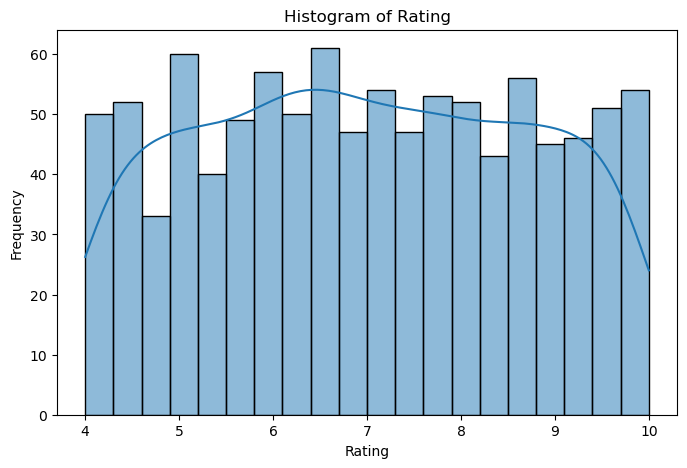

In [50]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Histogram of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

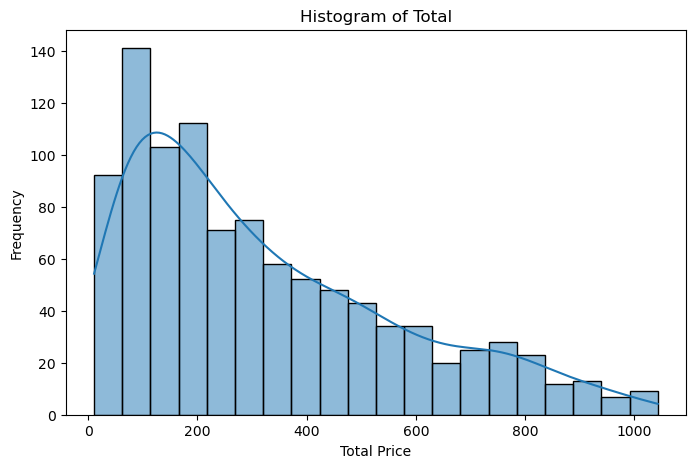

In [106]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Total'], bins=20, kde=True)
plt.title('Histogram of Total')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# uniform distributed with right skewed

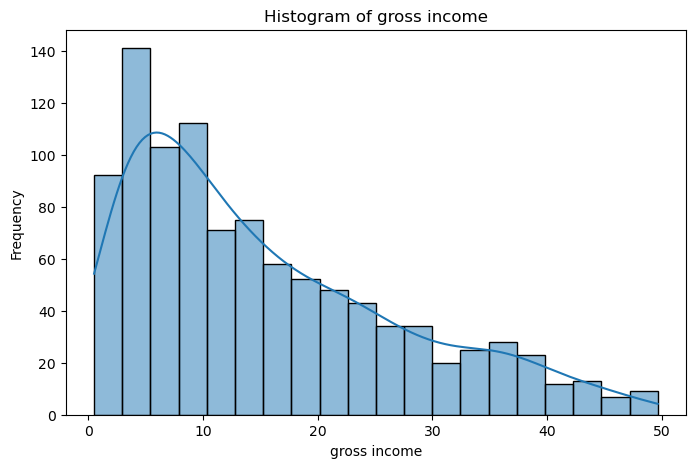

In [107]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['gross income'], bins=20, kde=True)
plt.title('Histogram of gross income')
plt.xlabel('gross income')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# uniform distributed with right skewed

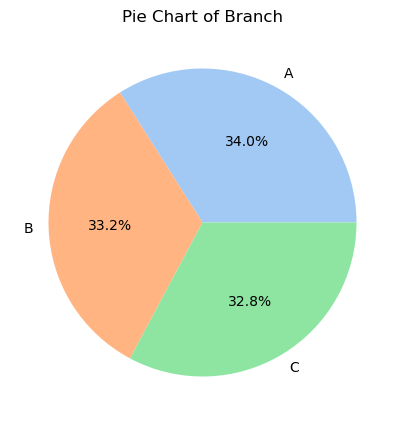

In [53]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Branch'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Branch')
plt.ylabel('')
plt.show()

In [ ]:
# Branches are unifromly distributed

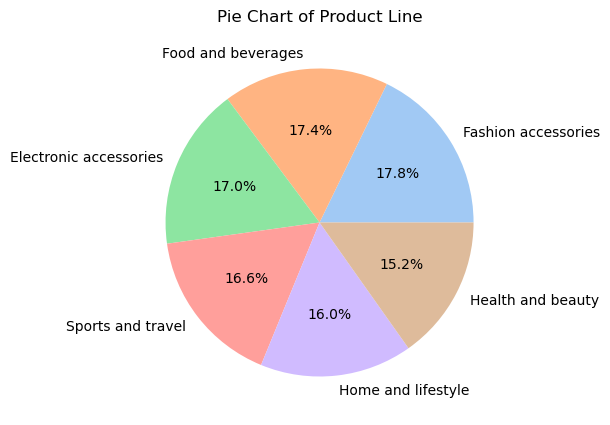

In [54]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Product line'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Product Line')
plt.ylabel('')
plt.show()

In [ ]:
# Product Line are unifromly distributed

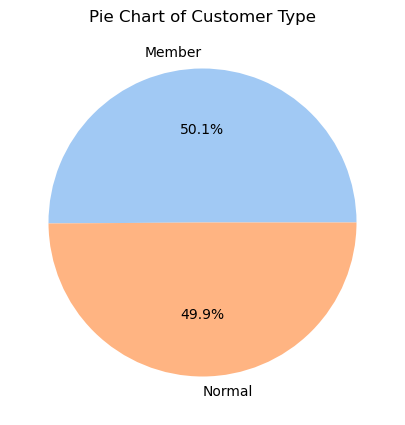

In [55]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Customer type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Customer Type')
plt.ylabel('')
plt.show()

In [ ]:
# Customer type are unifromly distributed

In [57]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['City'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of city')
plt.ylabel('')
plt.show()

In [ ]:
# City are unifromly distributed

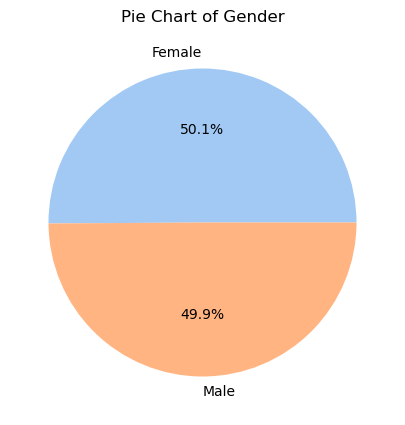

In [58]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Gender')
plt.ylabel('')
plt.show()

In [ ]:
# Gender is unifromly distributed

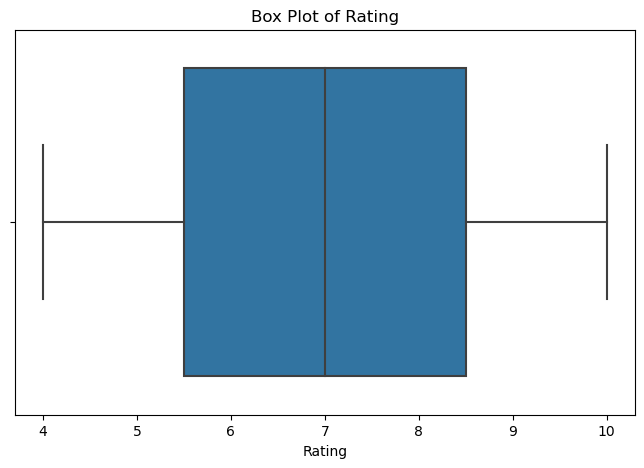

In [59]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rating'])
plt.title('Box Plot of Rating')
plt.xlabel('Rating')
plt.show()

In [60]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total'])
plt.title('Box Plot of Total')
plt.xlabel('Total')
plt.show()

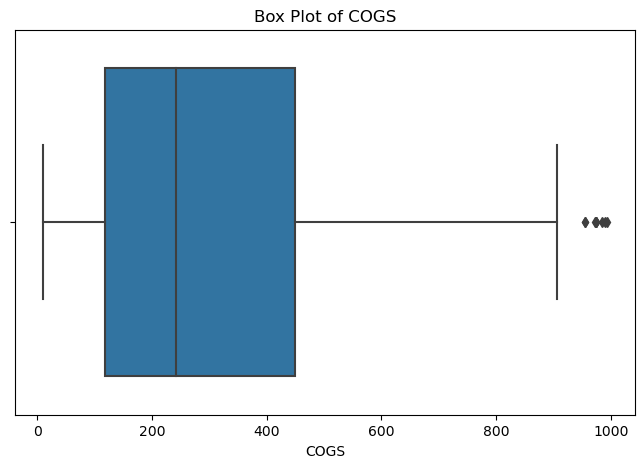

In [61]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['cogs'])
plt.title('Box Plot of COGS')
plt.xlabel('COGS')
plt.show()

In [108]:
sns.scatterplot(x=df.cogs, y=df.Rating)

<Axes: xlabel='cogs', ylabel='Rating'>

In [112]:
sns.scatterplot(x=df.cogs, y=df.Rating,hue=df.Gender)

<Axes: xlabel='cogs', ylabel='Rating'>

In [308]:
# Step 5: Observations from data visualization
# - columns Invoice ID, Date,Time and payment could be dropped
# - Outliers require rows to be trimmed
# - the catrgorical data has to be encoded


# Data Preprocessing

In [113]:
# Step 1: columns Invoice ID, Date,Time and payment could be dropped
df = df.drop(columns=['Invoice ID', 'Date','Time','Payment'])

In [114]:
df.shape

(1000, 13)

In [115]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()


Unit price  Quantity   Tax 5%     Total    cogs  gross margin percentage  \
0       74.69         7  26.1415  548.9715  522.83                 4.761905   
1       15.28         5   3.8200   80.2200   76.40                 4.761905   
2       46.33         7  16.2155  340.5255  324.31                 4.761905   
3       58.22         8  23.2880  489.0480  465.76                 4.761905   
4       86.31         7  30.2085  634.3785  604.17                 4.761905   

   gross income  Rating  
0       26.1415     9.1  
1        3.8200     9.6  
2       16.2155     7.4  
3       23.2880     8.4  
4       30.2085     5.3

In [116]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]


In [117]:
outlier_remover(df_num,df)

In [118]:
df.shape

(1000, 13)

<Axes: xlabel='Rating'>

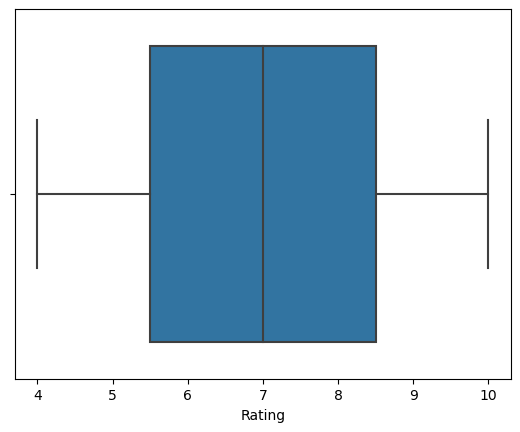

In [119]:
sns.boxplot(x=df['Rating'])

In [120]:
X = df.drop('Rating', axis=1)
y = df.Rating
X.head()

Branch       City Customer type  Gender            Product line  Unit price  \
0      A     Yangon        Member  Female       Health and beauty       74.69   
1      C  Naypyitaw        Normal  Female  Electronic accessories       15.28   
2      A     Yangon        Normal    Male      Home and lifestyle       46.33   
3      A     Yangon        Member    Male       Health and beauty       58.22   
4      A     Yangon        Normal    Male       Sports and travel       86.31   

   Quantity   Tax 5%     Total    cogs  gross margin percentage  gross income  
0         7  26.1415  548.9715  522.83                 4.761905       26.1415  
1         5   3.8200   80.2200   76.40                 4.761905        3.8200  
2         7  16.2155  340.5255  324.31                 4.761905       16.2155  
3         8  23.2880  489.0480  465.76                 4.761905       23.2880  
4         7  30.2085  634.3785  604.17                 4.761905       30.2085

In [121]:
X_num = X.select_dtypes('number')
X_num.head()

Unit price  Quantity   Tax 5%     Total    cogs  gross margin percentage  \
0       74.69         7  26.1415  548.9715  522.83                 4.761905   
1       15.28         5   3.8200   80.2200   76.40                 4.761905   
2       46.33         7  16.2155  340.5255  324.31                 4.761905   
3       58.22         8  23.2880  489.0480  465.76                 4.761905   
4       86.31         7  30.2085  634.3785  604.17                 4.761905   

   gross income  
0       26.1415  
1        3.8200  
2       16.2155  
3       23.2880  
4       30.2085

In [122]:
X_cat = X.select_dtypes('object')
X_cat.head()

Branch       City Customer type  Gender            Product line
0      A     Yangon        Member  Female       Health and beauty
1      C  Naypyitaw        Normal  Female  Electronic accessories
2      A     Yangon        Normal    Male      Home and lifestyle
3      A     Yangon        Member    Male       Health and beauty
4      A     Yangon        Normal    Male       Sports and travel

In [123]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [124]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [125]:
X_num_scaled.describe()

Unit price     Quantity       Tax 5%        Total         cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.507256     0.501111     0.302613     0.302613     0.302613   
std       0.294778     0.324826     0.238268     0.238268     0.238268   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.253616     0.222222     0.110220     0.110220     0.110220   
50%       0.502336     0.444444     0.235636     0.235636     0.235636   
75%       0.754951     0.777778     0.446400     0.446400     0.446400   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       gross margin percentage  gross income  
count                   1000.0   1000.000000  
mean                       0.0      0.302613  
std                        0.0      0.238268  
min                        0.0      0.000000  
25%                        0.0      0.110220  
50%                        0.0      0.235636  
75%                        0.0      0.446400  
max                        0.0      1.000000

In [126]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  

In [127]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [128]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((1000, 23), (1000, 7), (1000, 16))

In [129]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
Unit price                             0
Quantity                               0
Tax 5%                                 0
Total                                  0
cogs                                   0
gross margin percentage                0
gross income                           0
Branch_A                               0
Branch_B                               0
Branch_C                               0
City_Mandalay                          0
City_Naypyitaw                         0
City_Yangon                            0
Customer type_Member                   0
Customer type_Normal                   0
Gender_Female                          0
Gender_Male                            0
Product line_Electronic accessories    0
Product line_Fashion accessories       0
Product line_Food and beverages        0
Product line_Health and beauty         0
Product line_Home and lifestyle        0
Product line_Sports and travel         0
dtype: 

In [130]:
X.describe()

Unit price     Quantity       Tax 5%        Total         cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.507256     0.501111     0.302613     0.302613     0.302613   
std       0.294778     0.324826     0.238268     0.238268     0.238268   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.253616     0.222222     0.110220     0.110220     0.110220   
50%       0.502336     0.444444     0.235636     0.235636     0.235636   
75%       0.754951     0.777778     0.446400     0.446400     0.446400   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       gross margin percentage  gross income     Branch_A     Branch_B  \
count                   1000.0   1000.000000  1000.000000  1000.000000   
mean                       0.0      0.302613     0.340000     0.332000   
std                        0.0      0.238268     0.473946     0.471167   
min                        0.0      0.000000     0.000000     0.000000   
25%                        0.0      0.110220     0.000000     0.000000   
50%                        0.0      0.235636     0.000000     0.000000   
75%                        0.0      0.446400     1.000000     1.000000   
max                        0.0      1.000000     1.000000     1.000000   

         Branch_C  ...  Customer type_Member  Customer type_Normal  \
count  1000.00000  ...           1000.000000           1000.000000   
mean      0.32800  ...              0.501000              0.499000   
std       0.46972  ...              0.500249              0.500249   
min       0.00000  ...              0.000000              0.000000   
25%       0.00000  ...              0.000000              0.000000   
50%       0.00000  ...              1.000000              0.000000   
75%       1.00000  ...              1.000000              1.000000   
max       1.00000  ...              1.000000              1.000000   

       Gender_Female  Gender_Male  Product line_Electronic accessories  \
count    1000.000000  1000.000000                          1000.000000   
mean        0.501000     0.499000                             0.170000   
std         0.500249     0.500249                             0.375821   
min         0.000000     0.000000                             0.000000   
25%         0.000000     0.000000                             0.000000   
50%         1.000000     0.000000                             0.000000   
75%         1.000000     1.000000                             0.000000   
max         1.000000     1.000000                             1.000000   

       Product line_Fashion accessories  Product line_Food and beverages  \
count                       1000.000000                      1000.000000   
mean                           0.178000                         0.174000   
std                            0.382704                         0.379299   
min                            0.000000                         0.000000   
25%                            0.000000                         0.000000   
50%                            0.000000                         0.000000   
75%                            0.000000                         0.000000   
max                            1.000000                         1.000000   

       Product line_Health and beauty  Product line_Home and lifestyle  \
count                     1000.000000                      1000.000000   
mean                         0.152000                         0.160000   
std                          0.359201                         0.366789   
min                          0.000000                         0.000000   
25%                          0.000000                         0.000000   
50%                          0.000000                         0.000000   
75%                          0.000000                         0.000000   
max                          1.000000                         1.000000   

       Product line_Spor

In [131]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(800, 23)
(200, 23)
(800,)
(200,)


In [46]:
# Step 9: Observations after preprocessing
# - Columns 'Invoice ID', 'Date','Time','Payment' are removed
# - outliers were removed
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

# KNN Regression

In [71]:
# Train the model with different K values and calculate MAPE scores using CV

In [133]:
def find_mape(y,y_pred):
    return np.mean(((np.abs(y-y_pred)/y)))

In [134]:
def test_holdout(k_list,X_train, X_test, y_train, y_test):
    train_mape_scores=[]
    test_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_train_pred = knn.predict(X_train)
        train_mape = find_mape(y_train, y_train_pred)
        train_mape_scores.append(train_mape)
        y_test_pred = knn.predict(X_test)
        test_mape = find_mape(y_test,y_test_pred)
        test_mape_scores.append(test_mape)
    best_k = k_list[np.argmin(test_mape_scores)]
    print("best k with holdout test is {0} and minimum test score is {1}".format(best_k,np.min(test_mape_scores)))
    return best_k,train_mape_scores,test_mape_scores

In [135]:
def cross_validation(X,y):
    cv_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        cv_scores = -cross_val_score(knn,X,y,cv=5,scoring='neg_mean_absolute_percentage_error')
        #print("for k = {}, cv_scores = {}".format(k,cv_scores))
        cv_mape = np.mean(cv_scores)
        cv_mape_scores.append(cv_mape)
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores

In [136]:
# user defined function for Cross Validation 
def custom_cross_validation(X,y,no_of_fold):
    warnings.filterwarnings('ignore', category=UserWarning)
    fold_size=len(X)//no_of_fold
    cv_mape_scores = []
    for k in k_list: 
        knn = KNeighborsRegressor(n_neighbors = k)
        scores = []
        for i in range(no_of_fold):
            start = i * fold_size
            end = (i + 1) * fold_size
            X_test_fold = X[start:end]
            y_test_fold = y[start:end]

            X_train_fold = np.concatenate([X[:start], X[end:]])
            y_train_fold = np.concatenate([y[:start], y[end:]])

            # Fit the model on the training data
            knn.fit(X_train_fold, y_train_fold)

            # Make predictions and calculate a custom score on the test data
            predictions = knn.predict(X_test_fold)
            custom_score = find_mape(predictions, y_test_fold)
            scores.append(custom_score)
        cv_mape_scores.append(np.mean(scores))
    
    # Calculate and return the average score
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with Custom cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores    
        
    

In [140]:
#validate_hold_out(X_train,X_test,y_train,y_test)
k_list=np.arange(1,10,2)
print("Starting test with Hold Out Data")
print("------------------------------------------")
best_k,train_mape_scores,test_mape_scores = test_holdout(k_list,X_train,X_test,y_train,y_test)
print("\n")
print("Starting test Cross-Validation")
print("------------------------------------------")
best_k_CV,cv_mape_scores= cross_validation(X,y)
print("\n")
print("Starting test with Custom Cross-Validation")
print("------------------------------------------")
best_k_CV_custom,cv_mape_scores_custom = custom_cross_validation( X, y, 5)


Starting test with Hold Out Data
------------------------------------------
best k with holdout test is 9 and minimum test score is 0.25081687219124754


Starting test Cross-Validation
------------------------------------------
best k with cross validation is 9 and minimum test score is 0.23777411465138046


Starting test with Custom Cross-Validation
------------------------------------------
best k with Custom cross validation is 9 and minimum test score is 0.21695046660415174


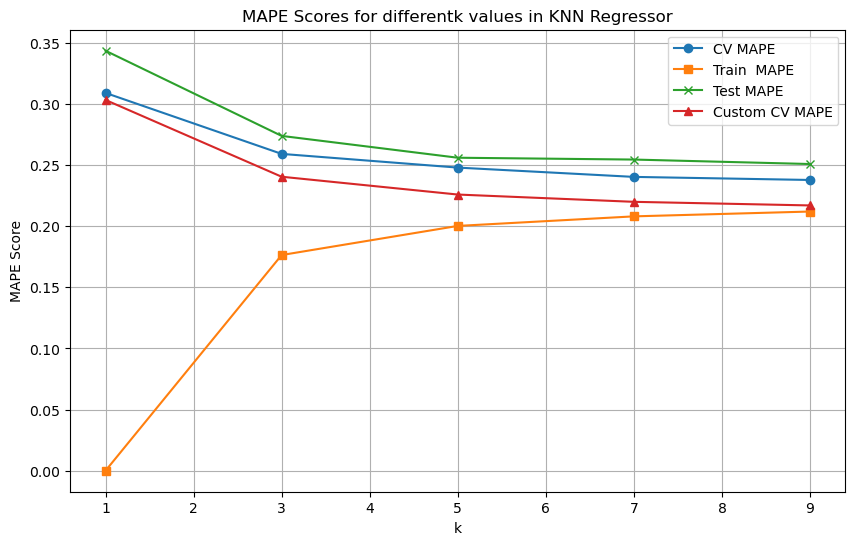

In [141]:
#plot CV MAPE, Train MAPE, Test MAPE for different values of K
plt.figure(figsize=(10,6))
plt.plot(k_list,cv_mape_scores,label='CV MAPE', marker='o')
plt.plot(k_list,train_mape_scores,label='Train  MAPE', marker='s')
plt.plot(k_list,test_mape_scores,label='Test MAPE', marker='x')
plt.plot(k_list,cv_mape_scores_custom,label='Custom CV MAPE', marker='^')
plt.xlabel('k')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for differentk values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()



### CUSTOM IMPLEMENTATION OF KNN

In [78]:
# function to compute euclidean distance
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [79]:
#custom function to implement KNN
def knn(X_train,X_test,y_train,k):
    mape_list = []
    y_pred_list = []
    
    for idx, test_row in X_test.iterrows():        
        distances = []
        for index,row in X_train.iterrows():
            distance = euclidean_distance(test_row,row)
            distances.append([distance,y_train[index]])
        distances.sort(key=lambda x: x[0])
        neighbors=distances[:k]
        target_values = np.take(np.array(neighbors),1,axis=1) #select only corresponding y_train values from nested list
        pred_val=np.mean(target_values)
        y_pred_list.append(pred_val)
    #mape = find_mape(y_test,y_pred_list)
    #mape_list.append(mape)
    
    return y_pred_list

In [ ]:
# Inference:
# - best k with holdout test is 9 
# - best k with cross validation is 9 


# Data Set 4

# Exploratory Data Analysis

In [45]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv('car_resale_prices.csv')

In [46]:
df.head()

Unnamed: 0                     full_name resale_price registered_year  \
0           0  2017 Maruti Baleno 1.2 Alpha  ₹ 5.45 Lakh            2017   
1           1            2018 Tata Hexa XTA    ₹ 10 Lakh            2018   
2           2   2015 Maruti Swift Dzire VXI  ₹ 4.50 Lakh            2015   
3           3   2015 Maruti Swift Dzire VXI  ₹ 4.50 Lakh            2015   
4           4    2009 Hyundai i10 Magna 1.1  ₹ 1.60 Lakh            2009   

  engine_capacity              insurance transmission_type  kms_driven  \
0         1197 cc  Third Party insurance            Manual  40,000 Kms   
1         2179 cc  Third Party insurance         Automatic  70,000 Kms   
2         1197 cc  Third Party insurance            Manual  70,000 Kms   
3         1197 cc  Third Party insurance            Manual  70,000 Kms   
4         1086 cc  Third Party insurance            Manual  80,000 Kms   

     owner_type fuel_type  max_power  seats     mileage  body_type  city  
0   First Owner    Petrol    83.1bhp    5.0   21.4 kmpl  Hatchback  Agra  
1   First Owner    Diesel  153.86bhp    7.0   17.6 kmpl        MUV  Agra  
2  Second Owner    Petrol   83.14bhp    5.0  20.85 kmpl      Sedan  Agra  
3  Second Owner    Petrol   83.14bhp    5.0  20.85 kmpl      Sedan  Agra  
4   First Owner    Petrol   68.05bhp    5.0  19.81 kmpl  Hatchback  Agra

In [4]:
# there are a mix of categorical and numeric columns
# label column is resale_price
# columns Unnamed,full_name could be dropped



In [47]:
df.shape

(17446, 15)

In [6]:
# there are 17446 observations and 15 features

In [48]:
df.dtypes

Unnamed: 0             int64
full_name             object
resale_price          object
registered_year       object
engine_capacity       object
insurance             object
transmission_type     object
kms_driven            object
owner_type            object
fuel_type             object
max_power             object
seats                float64
mileage               object
body_type             object
city                  object
dtype: object

In [8]:
# columns resale_price,engine_capacity,kms_driven,max_power,mileage is shown as objects. They have to be converted to numerical columns
# some columns require encoding as they are categorical

In [49]:
print(df.columns)

Index(['Unnamed: 0', 'full_name', 'resale_price', 'registered_year',
       'engine_capacity', 'insurance', 'transmission_type', 'kms_driven',
       'owner_type', 'fuel_type', 'max_power', 'seats', 'mileage', 'body_type',
       'city'],
      dtype='object')


In [50]:
df['mileage'] = pd.to_numeric(df['mileage'].astype(str).str.replace('kmpl', ''), errors='coerce')

In [51]:
df['max_power'] = pd.to_numeric(df['max_power'].astype(str).str.replace('bhp', ''), errors='coerce')

In [52]:
df['resale_price'] = pd.to_numeric(df['resale_price'].astype(str).str.replace('₹', '').str.replace('Lakh', ''), errors='coerce')

In [53]:
df['kms_driven'] = pd.to_numeric(df['kms_driven'].astype(str).str.replace('Kms', '').str.replace(',', ''), errors='coerce')

In [54]:
df['engine_capacity'] = pd.to_numeric(df['engine_capacity'].astype(str).str.replace('cc', ''), errors='coerce')

In [55]:
df.head()

Unnamed: 0                     full_name  resale_price registered_year  \
0           0  2017 Maruti Baleno 1.2 Alpha          5.45            2017   
1           1            2018 Tata Hexa XTA         10.00            2018   
2           2   2015 Maruti Swift Dzire VXI          4.50            2015   
3           3   2015 Maruti Swift Dzire VXI          4.50            2015   
4           4    2009 Hyundai i10 Magna 1.1          1.60            2009   

   engine_capacity              insurance transmission_type  kms_driven  \
0           1197.0  Third Party insurance            Manual     40000.0   
1           2179.0  Third Party insurance         Automatic     70000.0   
2           1197.0  Third Party insurance            Manual     70000.0   
3           1197.0  Third Party insurance            Manual     70000.0   
4           1086.0  Third Party insurance            Manual     80000.0   

     owner_type fuel_type  max_power  seats  mileage  body_type  city  
0   First Owner    Petrol      83.10    5.0    21.40  Hatchback  Agra  
1   First Owner    Diesel     153.86    7.0    17.60        MUV  Agra  
2  Second Owner    Petrol      83.14    5.0    20.85      Sedan  Agra  
3  Second Owner    Petrol      83.14    5.0    20.85      Sedan  Agra  
4   First Owner    Petrol      68.05    5.0    19.81  Hatchback  Agra

In [10]:
# Step 2: Summary statistics of numeric columns

In [56]:
df.describe()

Unnamed: 0  resale_price  engine_capacity    kms_driven  \
count  17446.000000  17212.000000     17432.000000  1.744300e+04   
mean    8722.500000      8.713414      1423.135383  5.862822e+04   
std     5036.370734      9.689100       474.683974  6.426464e+04   
min        0.000000      1.000000         0.000000  2.860000e+02   
25%     4361.250000      3.850000      1197.000000  3.192200e+04   
50%     8722.500000      5.900000      1248.000000  5.481700e+04   
75%    13083.750000      9.200000      1498.000000  7.991300e+04   
max    17445.000000     97.000000      5998.000000  6.275000e+06   

          max_power         seats       mileage  
count  16924.000000  17436.000000  16787.000000  
mean     103.902932      5.205494     19.317058  
std       44.840775      0.669321      4.384732  
min       25.400000      2.000000      6.700000  
25%       78.900000      5.000000     17.000000  
50%       88.500000      5.000000     18.900000  
75%      118.350000      5.000000     21.490000  
max      558.000000     14.000000    140.000000

In [12]:
# There are some missing values in resale_price,engine_capacity,max_power,mileage
# some columns may have outliers

In [57]:
df.isnull().sum()*100/df.shape[0]

Unnamed: 0           0.000000
full_name            0.000000
resale_price         1.341282
registered_year      0.395506
engine_capacity      0.080248
insurance            0.040124
transmission_type    0.000000
kms_driven           0.017196
owner_type           0.257939
fuel_type            0.000000
max_power            2.992090
seats                0.057320
mileage              3.777370
body_type            0.000000
city                 0.000000
dtype: float64

In [14]:
# -missing rows to be removed

In [15]:
# Step 3: Value counts of category columns

In [58]:
df.select_dtypes(include='object').columns

Index(['full_name', 'registered_year', 'insurance', 'transmission_type',
       'owner_type', 'fuel_type', 'body_type', 'city'],
      dtype='object')

In [60]:
df.select_dtypes(include='object').describe()

full_name registered_year              insurance  \
count                           17446           17377                  17439   
unique                           6923             243                      7   
top     2016 Hyundai Grand i10 Sportz            2022  Third Party insurance   
freq                               51             399                   7559   

       transmission_type   owner_type fuel_type  body_type   city  
count              17446        17401     17446      17446  17446  
unique                 2            5         5         26     13  
top               Manual  First Owner    Petrol  Hatchback  Delhi  
freq               12541        12293     11336       7343   3036

In [ ]:
# column registered_year may be dropped

In [61]:

df.insurance.value_counts()

Third Party insurance    7559
Comprehensive            6414
Third Party              1973
Zero Dep                  834
Not Available             651
1                           5
2                           3
Name: insurance, dtype: int64

In [62]:
df.transmission_type.value_counts()

Manual       12541
Automatic     4905
Name: transmission_type, dtype: int64

In [63]:
df.owner_type.value_counts()

First Owner     12293
Second Owner     4150
Third Owner       780
Fourth Owner      127
Fifth Owner        51
Name: owner_type, dtype: int64

In [64]:
df.fuel_type.value_counts()

Petrol      11336
Diesel       5516
CNG           504
Electric       61
LPG            29
Name: fuel_type, dtype: int64

In [65]:
df.body_type.value_counts()

Hatchback        7343
Sedan            4781
SUV              4406
MUV               759
Minivans           65
Maruti             19
Pickup             13
Coupe              10
Cars                8
Tata                7
Mercedes-Benz       6
Mahindra            4
Chevrolet           3
Jaguar              3
Wagon               3
BMW                 2
Toyota              2
Datsun              2
Honda               2
Convertibles        2
Audi                1
Porsche             1
Volvo               1
Hyundai             1
Skoda               1
Isuzu               1
Name: body_type, dtype: int64

In [ ]:
# for body type, less frequent types (below 500) may be dropped

In [71]:
df.city.value_counts()

Delhi         3036
Bangalore     2334
Mumbai        2109
Hyderabad     1584
Pune          1394
Chennai       1344
Ahmedabad     1330
Kolkata       1181
Gurgaon       1043
Jaipur         897
Lucknow        551
Chandigarh     437
Agra           206
Name: city, dtype: int64

In [66]:
df.columns

Index(['Unnamed: 0', 'full_name', 'resale_price', 'registered_year',
       'engine_capacity', 'insurance', 'transmission_type', 'kms_driven',
       'owner_type', 'fuel_type', 'max_power', 'seats', 'mileage', 'body_type',
       'city'],
      dtype='object')

In [67]:
df['resale_price'].groupby([df['owner_type']]).mean()

owner_type
Fifth Owner     2.803659
First Owner     9.372853
Fourth Owner    3.919829
Second Owner    7.466447
Third Owner     5.364791
Name: resale_price, dtype: float64

In [70]:
df['resale_price'].groupby([df['fuel_type']]).mean()

fuel_type
CNG          4.901116
Diesel      12.626338
Electric    17.468571
LPG          2.196957
Petrol       6.925937
Name: resale_price, dtype: float64

In [73]:
pd.crosstab(df.city,df.owner_type,values=df.resale_price,aggfunc='mean')

owner_type  Fifth Owner  First Owner  Fourth Owner  Second Owner  Third Owner
city                                                                         
Agra           2.000000     5.543565      2.880000      4.483226     3.118000
Ahmedabad      1.942857     8.091448      2.340909      5.915294     3.551724
Bangalore      3.710909    10.099717      4.962500      8.307718     5.969298
Chandigarh     2.425000     6.867204      3.650000      6.156018     3.720000
Chennai        1.450000    10.770328      2.841667      6.993134     4.668654
Delhi          6.000000    10.318510      2.435000      9.613717     5.266337
Gurgaon        1.250000     9.098930      2.932500      5.572308     6.590000
Hyderabad      3.000000     9.053507      2.500000      5.810824     5.895682
Jaipur         2.168571     7.972422      2.552857      5.963301     4.039365
Kolkata        2.600000     8.308214      8.791429      7.519091     8.479500
Lucknow        2.080000     6.452677      3.186000      4.516194     3.556471
Mumbai         4.600000    11.361043      3.103571      9.208048     5.615158
Pune                NaN     7.548977      5.993000      6.855753     6.368923

In [27]:
# Step 4: Data Visualization

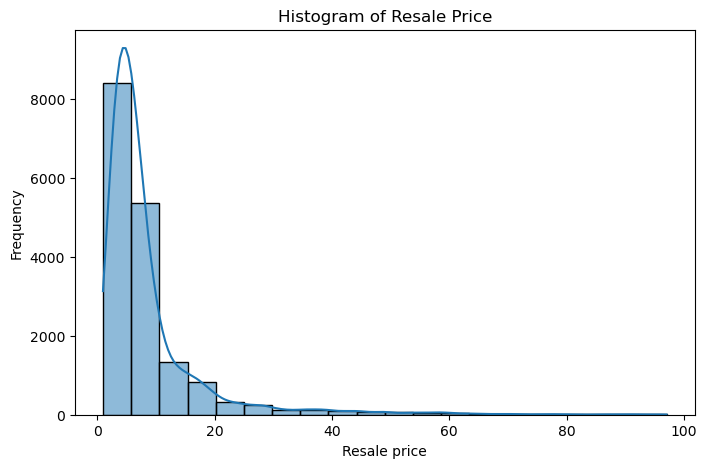

In [74]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['resale_price'], bins=20, kde=True)
plt.title('Histogram of Resale Price')
plt.xlabel('Resale price')
plt.ylabel('Frequency')
plt.show()

In [29]:
# the actual productivity is normally distributed with right skewed

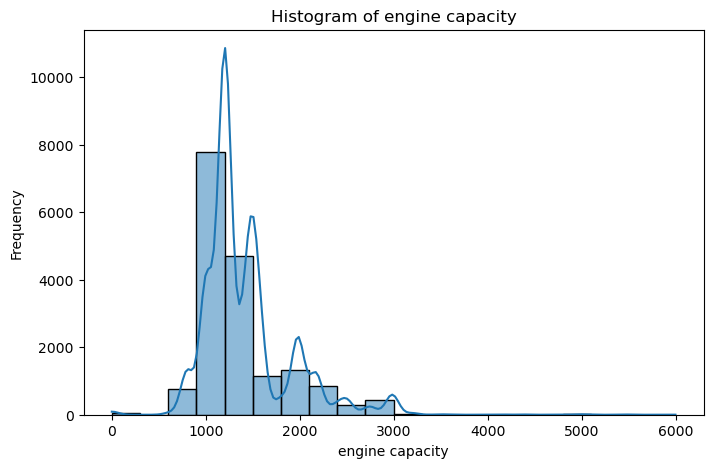

In [75]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['engine_capacity'], bins=20, kde=True)
plt.title('Histogram of engine capacity')
plt.xlabel('engine capacity')
plt.ylabel('Frequency')
plt.show()

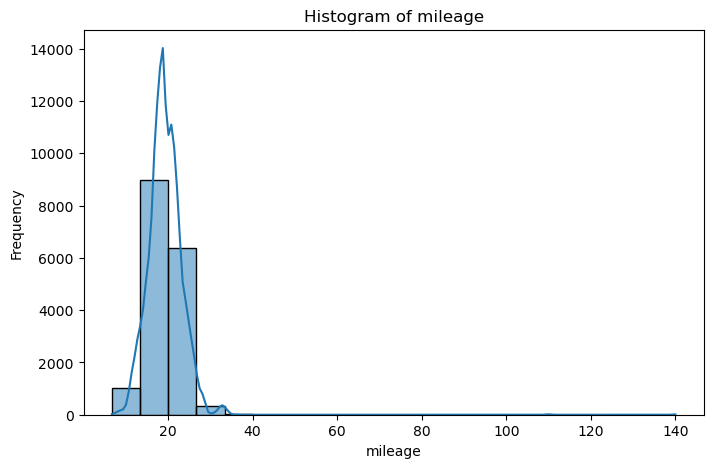

In [76]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['mileage'], bins=20, kde=True)
plt.title('Histogram of mileage')
plt.xlabel('mileage')
plt.ylabel('Frequency')
plt.show()

In [33]:
#there are a lot of outliers in mileage

In [37]:
# there may be outliers

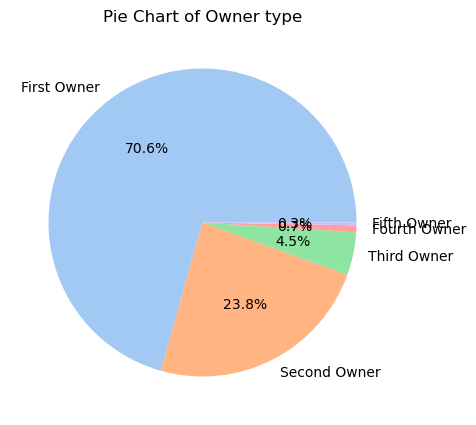

In [77]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['owner_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Owner type')
plt.ylabel('')
plt.show()

In [ ]:
# owner type distribution is not uniform

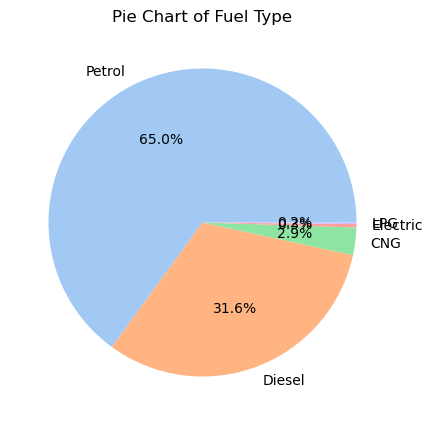

In [78]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['fuel_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Fuel Type')
plt.ylabel('')
plt.show()

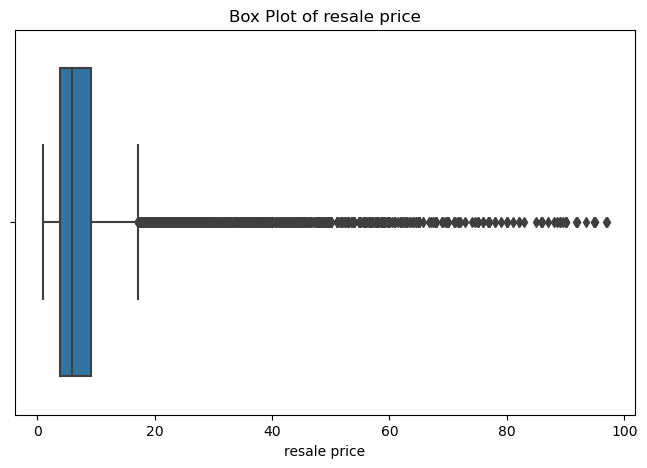

In [79]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['resale_price'])
plt.title('Box Plot of resale price')
plt.xlabel('resale price')
plt.show()

In [41]:
# shows some outliers in resale price column

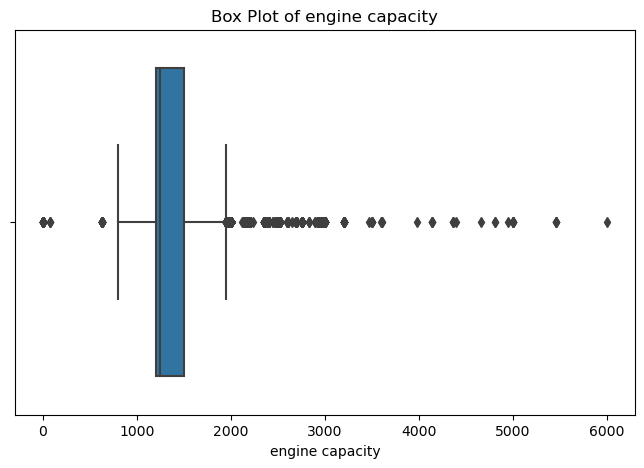

In [81]:

# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['engine_capacity'])
plt.title('Box Plot of engine capacity')
plt.xlabel('engine capacity')
plt.show()

<Axes: xlabel='engine_capacity', ylabel='resale_price'>

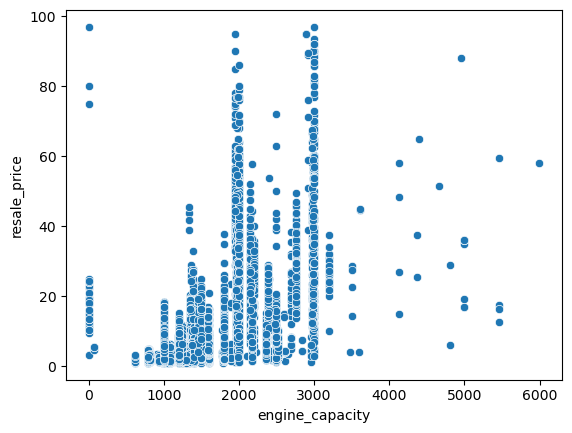

In [82]:
sns.scatterplot(x=df.engine_capacity, y=df.resale_price)

<Axes: xlabel='kms_driven', ylabel='resale_price'>

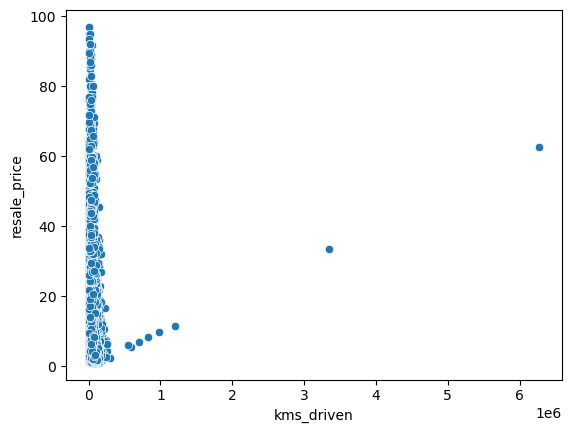

In [83]:
sns.scatterplot(x=df.kms_driven, y=df.resale_price)

In [ ]:
# resale price seems to be higher for less kms driven

<Axes: xlabel='max_power', ylabel='resale_price'>

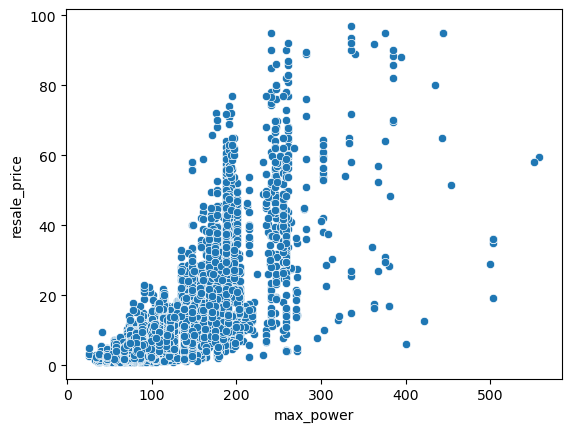

In [84]:
sns.scatterplot(x=df.max_power, y=df.resale_price)

In [46]:
# Step 5: Observations from data visualization
# - columns Unnamed,full_name could be dropped
# - missing rows to be trimmed
# - Outliers require rows to be trimmed
# - for body type, less frequent types (below 500) may be dropped



# Data Preprocessing

In [85]:
# Step 1: Remove Unnamed,full_name columns
df = df.drop(columns=['Unnamed: 0', 'full_name'])

In [86]:
df.shape

(17446, 13)

In [87]:
df.isnull().sum()

resale_price         234
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            522
seats                 10
mileage              659
body_type              0
city                   0
dtype: int64

In [88]:
df = df.dropna()

In [89]:
df.shape

(16078, 13)

In [90]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()


resale_price  engine_capacity  kms_driven  max_power  seats  mileage
0          5.45           1197.0     40000.0      83.10    5.0    21.40
1         10.00           2179.0     70000.0     153.86    7.0    17.60
2          4.50           1197.0     70000.0      83.14    5.0    20.85
3          4.50           1197.0     70000.0      83.14    5.0    20.85
4          1.60           1086.0     80000.0      68.05    5.0    19.81

In [91]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
    return df


In [92]:
df = outlier_remover(df_num,df)

In [93]:
df.shape

(12305, 13)

<Axes: xlabel='resale_price'>

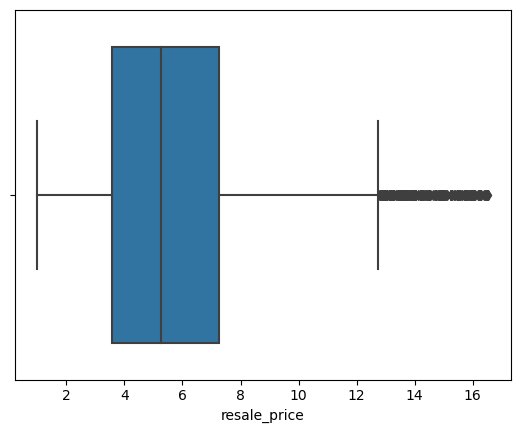

In [94]:
sns.boxplot(x=df['resale_price'])

In [95]:
df_num = df.select_dtypes(include='number')
df = outlier_remover(df_num,df)

<Axes: xlabel='resale_price'>

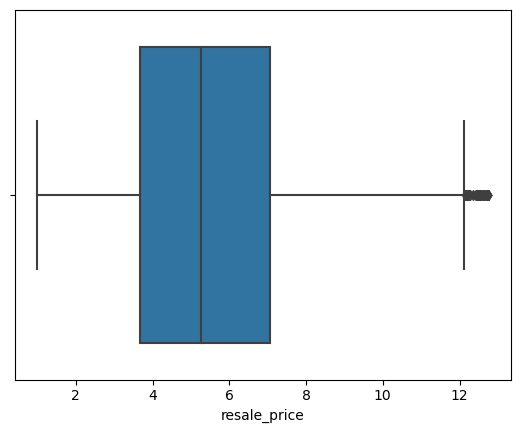

In [97]:
sns.boxplot(x=df['resale_price'])

In [98]:
df.shape

(11237, 13)

In [99]:
df_num = df.select_dtypes(include='number')
df = outlier_remover(df_num,df)

<Axes: xlabel='resale_price'>

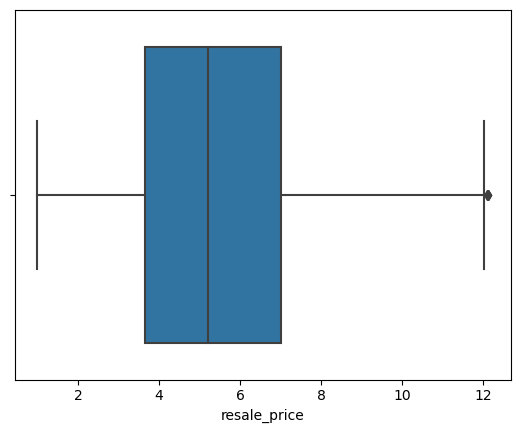

In [100]:
sns.boxplot(x=df['resale_price'])

In [101]:
df.shape

(11068, 13)

In [102]:
X = df.drop('resale_price', axis=1)
y = df.resale_price
X.head()

registered_year  engine_capacity              insurance transmission_type  \
0            2017           1197.0  Third Party insurance            Manual   
2            2015           1197.0  Third Party insurance            Manual   
3            2015           1197.0  Third Party insurance            Manual   
4            2009           1086.0  Third Party insurance            Manual   
5            2015           1197.0  Third Party insurance            Manual   

   kms_driven    owner_type fuel_type  max_power  seats  mileage  body_type  \
0     40000.0   First Owner    Petrol      83.10    5.0    21.40  Hatchback   
2     70000.0  Second Owner    Petrol      83.14    5.0    20.85      Sedan   
3     70000.0  Second Owner    Petrol      83.14    5.0    20.85      Sedan   
4     80000.0   First Owner    Petrol      68.05    5.0    19.81  Hatchback   
5     70000.0   First Owner    Petrol      81.86    5.0    17.19  Hatchback   

   city  
0  Agra  
2  Agra  
3  Agra  
4  Agra  
5  Agra

In [103]:
X_num = X.select_dtypes('number')
X_num.head()

engine_capacity  kms_driven  max_power  seats  mileage
0           1197.0     40000.0      83.10    5.0    21.40
2           1197.0     70000.0      83.14    5.0    20.85
3           1197.0     70000.0      83.14    5.0    20.85
4           1086.0     80000.0      68.05    5.0    19.81
5           1197.0     70000.0      81.86    5.0    17.19

In [104]:
X_cat = X.select_dtypes('object')
X_cat.head()

registered_year              insurance transmission_type    owner_type  \
0            2017  Third Party insurance            Manual   First Owner   
2            2015  Third Party insurance            Manual  Second Owner   
3            2015  Third Party insurance            Manual  Second Owner   
4            2009  Third Party insurance            Manual   First Owner   
5            2015  Third Party insurance            Manual   First Owner   

  fuel_type  body_type  city  
0    Petrol  Hatchback  Agra  
2    Petrol      Sedan  Agra  
3    Petrol      Sedan  Agra  
4    Petrol  Hatchback  Agra  
5    Petrol  Hatchback  Agra

In [105]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [106]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [107]:
X_num_scaled.describe()

engine_capacity    kms_driven     max_power    seats       mileage
count     11068.000000  11068.000000  11068.000000  11068.0  11068.000000
mean          0.445490      0.402551      0.500810      0.0      0.511561
std           0.189419      0.208780      0.202728      0.0      0.191270
min           0.000000      0.000000      0.000000      0.0      0.000000
25%           0.388832      0.240654      0.351700      0.0      0.381081
50%           0.388832      0.389205      0.455217      0.0      0.506757
75%           0.656853      0.544485      0.628370      0.0      0.635135
max           1.000000      1.000000      1.000000      0.0      1.000000

In [110]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  

In [111]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [112]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((11068, 254), (11068, 5), (11068, 249))

In [113]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
engine_capacity    0
kms_driven         0
max_power          0
seats              0
mileage            0
                  ..
city_Jaipur        0
city_Kolkata       0
city_Lucknow       0
city_Mumbai        0
city_Pune          0
Length: 254, dtype: int64
0
(11068, 254)
(11068,)


In [114]:
X.describe()

engine_capacity    kms_driven     max_power    seats       mileage  \
count     11068.000000  11068.000000  11068.000000  11068.0  11068.000000   
mean          0.445490      0.402551      0.500810      0.0      0.511561   
std           0.189419      0.208780      0.202728      0.0      0.191270   
min           0.000000      0.000000      0.000000      0.0      0.000000   
25%           0.388832      0.240654      0.351700      0.0      0.381081   
50%           0.388832      0.389205      0.455217      0.0      0.506757   
75%           0.656853      0.544485      0.628370      0.0      0.635135   
max           1.000000      1.000000      1.000000      0.0      1.000000   

       registered_year_2004  registered_year_2005  registered_year_2006  \
count          11068.000000          11068.000000          11068.000000   
mean               0.000090              0.000361              0.001175   
std                0.009505              0.019008              0.034253   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000              1.000000              1.000000   

       registered_year_2007  registered_year_2008  ...  city_Chandigarh  \
count          11068.000000          11068.000000  ...     11068.000000   
mean               0.001265              0.002891  ...         0.026382   
std                0.035545              0.053695  ...         0.160277   
min                0.000000              0.000000  ...         0.000000   
25%                0.000000              0.000000  ...         0.000000   
50%                0.000000              0.000000  ...         0.000000   
75%                0.000000              0.000000  ...         0.000000   
max                1.000000              1.000000  ...         1.000000   

       city_Chennai    city_Delhi  city_Gurgaon  city_Hyderabad   city_Jaipur  \
count  11068.000000  11068.000000  11068.000000    11068.000000  11068.000000   
mean       0.080954      0.162812      0.060987        0.095229      0.050416   
std        0.272777      0.369210      0.239317        0.293545      0.218811   
min        0.000000      0.000000      0.000000        0.000000      0.000000   
25%        0.000000      0.000000      0.000000        0.000000      0.000000   
50%        0.000000      0.000000      0.000000        0.000000      0.000000   
75%        0.000000      0.000000      0.000000        0.000000      0.000000   
max        1.000000      1.000000      1.000000        1.000000      1.000000   

       city_Kolkata  city_Lucknow   city_Mumbai     city_Pune  
count  11068.000000  11068.000000  11068.000000  11068.000000  
mean       0.065504      0.036140      0.105258      0.082851  
std        0.247425      0.186647      0.306900      0.275670  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000  

[8 rows x 254 columns]

In [115]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(8854, 254)
(2214, 254)
(8854,)
(2214,)


In [74]:
# Step 9: Observations after preprocessing
# - Removed Unnamed,full_name columns
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

# KNN Regression

In [75]:
# Train the model with different K values and calculate MAPE scores using CV

In [117]:
def find_mape(y,y_pred):
    return np.mean(((np.abs(y-y_pred)/y)))

In [118]:
def test_holdout(k_list,X_train, X_test, y_train, y_test):
    train_mape_scores=[]
    test_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_train_pred = knn.predict(X_train)
        train_mape = find_mape(y_train, y_train_pred)
        train_mape_scores.append(train_mape)
        y_test_pred = knn.predict(X_test)
        test_mape = find_mape(y_test,y_test_pred)
        test_mape_scores.append(test_mape)
    best_k = k_list[np.argmin(test_mape_scores)]
    print("best k with holdout test is {0} and minimum test score is {1}".format(best_k,np.min(test_mape_scores)))
    return best_k,train_mape_scores,test_mape_scores

In [119]:
def cross_validation(X,y):
    cv_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        cv_scores = -cross_val_score(knn,X,y,cv=5,scoring='neg_mean_absolute_percentage_error')
        #print("for k = {}, cv_scores = {}".format(k,cv_scores))
        cv_mape = np.mean(cv_scores)
        cv_mape_scores.append(cv_mape)
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores

In [120]:
# user defined function for Cross Validation 
def custom_cross_validation(X,y,no_of_fold):
    warnings.filterwarnings('ignore', category=UserWarning)
    fold_size=len(X)//no_of_fold
    cv_mape_scores = []
    for k in k_list: 
        knn = KNeighborsRegressor(n_neighbors = k)
        scores = []
        for i in range(no_of_fold):
            start = i * fold_size
            end = (i + 1) * fold_size
            X_test_fold = X[start:end]
            y_test_fold = y[start:end]

            X_train_fold = np.concatenate([X[:start], X[end:]])
            y_train_fold = np.concatenate([y[:start], y[end:]])

            # Fit the model on the training data
            knn.fit(X_train_fold, y_train_fold)

            # Make predictions and calculate a custom score on the test data
            predictions = knn.predict(X_test_fold)
            custom_score = np.mean(np.abs(predictions - y_test_fold))
            scores.append(custom_score)
        cv_mape_scores.append(np.mean(scores))
    
    # Calculate and return the average score
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with Custom cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores    
        
    

In [121]:
#validate_hold_out(X_train,X_test,y_train,y_test)
k_list=np.arange(1,10,2)
print("Starting test with Hold Out Data")
print("------------------------------------------")
best_k,train_mape_scores,test_mape_scores = test_holdout(k_list,X_train,X_test,y_train,y_test)
print("\n")
print("Starting test Cross-Validation")
print("------------------------------------------")
best_k_CV,cv_mape_scores= cross_validation(X,y)
print("\n")
print("Starting test with Custom Cross-Validation")
print("------------------------------------------")
best_k_CV_custom,cv_mape_scores_custom = custom_cross_validation( X, y, 5)


Starting test with Hold Out Data
------------------------------------------
best k with holdout test is 3 and minimum test score is 0.23418743273222892


Starting test Cross-Validation
------------------------------------------
best k with cross validation is 5 and minimum test score is 0.24564695341898618


Starting test with Custom Cross-Validation
------------------------------------------
best k with Custom cross validation is 5 and minimum test score is 1.0603152281970176


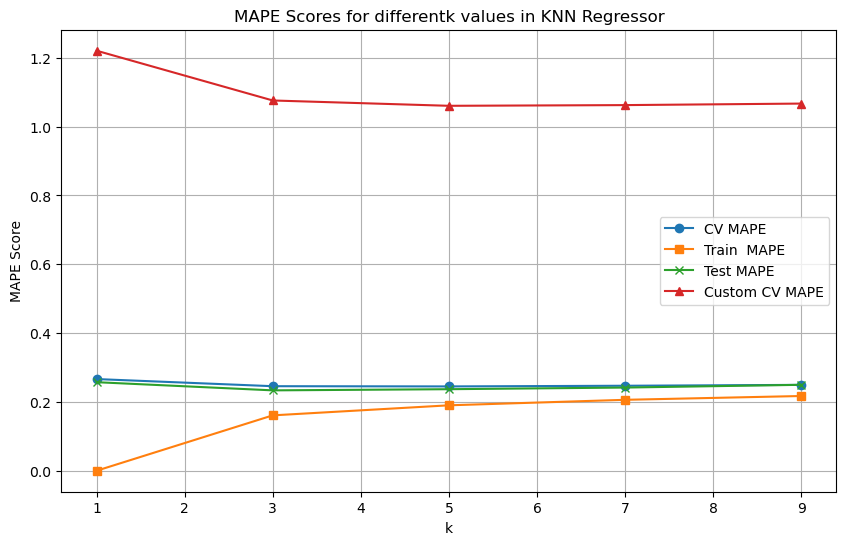

In [122]:
#plot CV MAPE, Train MAPE, Test MAPE for different values of K
plt.figure(figsize=(10,6))
plt.plot(k_list,cv_mape_scores,label='CV MAPE', marker='o')
plt.plot(k_list,train_mape_scores,label='Train  MAPE', marker='s')
plt.plot(k_list,test_mape_scores,label='Test MAPE', marker='x')
plt.plot(k_list,cv_mape_scores_custom,label='Custom CV MAPE', marker='^')
plt.xlabel('k')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for differentk values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()



### CUSTOM IMPLEMENTATION OF KNN

In [84]:
# function to compute euclidean distance
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [88]:
#custom function to implement KNN
def knn(X_train,X_test,y_train,k):
    mape_list = []
    y_pred_list = []
    
    for idx, test_row in X_test.iterrows():        
        distances = []
        for index,row in X_train.iterrows():
            distance = euclidean_distance(test_row,row)
            distances.append([distance,y_train[index]])
        distances.sort(key=lambda x: x[0])
        neighbors=distances[:k]
        target_values = np.take(np.array(neighbors),1,axis=1) #select only corresponding y_train values from nested list
        pred_val=np.mean(target_values)
        y_pred_list.append(pred_val)
    #mape = find_mape(y_test,y_pred_list)
    #mape_list.append(mape)
    
    return y_pred_list

In [ ]:
# Inference:
# - best k with holdout test is 3 
# - best k with cross validation is 5 


# Data Set 5

# Exploratory Data Analysis

In [2]:
df_wine =pd.read_csv("winequality-red.csv")

In [3]:
df_wine.shape

(1599, 12)

In [4]:
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
#There are no categorical columns in the table
#There are 1599 rows and 12 columns

In [6]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [9]:
#there are no missing values
#y label is quality

In [10]:
Q1 = df_wine.select_dtypes('number').quantile(0.25)
Q3 = df_wine.select_dtypes('number').quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
potential_outliers = (df_wine.select_dtypes('number') < lower_bound) | (df_wine.select_dtypes('number') > upper_bound)
potential_outliers.sum()

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                  28
dtype: int64

In [12]:
#There may be lot of outliers in residual sugar and chlorides

In [13]:
#Data Visualisation

In [14]:
plt.figure(figsize=(8, 5))
sns.pairplot(df_wine)
plt.title('Pair plot')
plt.xlabel('')
plt.show()

<Figure size 800x500 with 0 Axes>

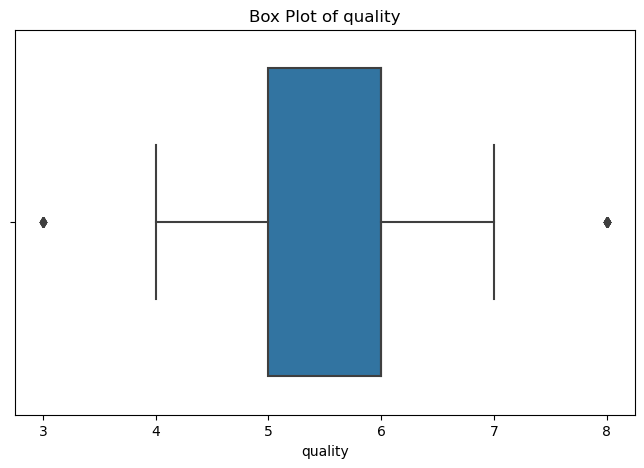

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_wine['quality'])
plt.title('Box Plot of quality')
plt.xlabel('quality')
plt.show()

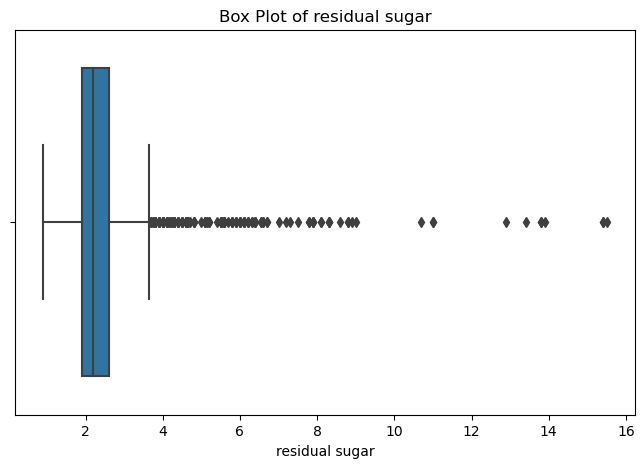

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_wine['residual sugar'])
plt.title('Box Plot of residual sugar')
plt.xlabel('residual sugar')
plt.show()

In [ ]:
# there are lot of outliers in the residual sugar column

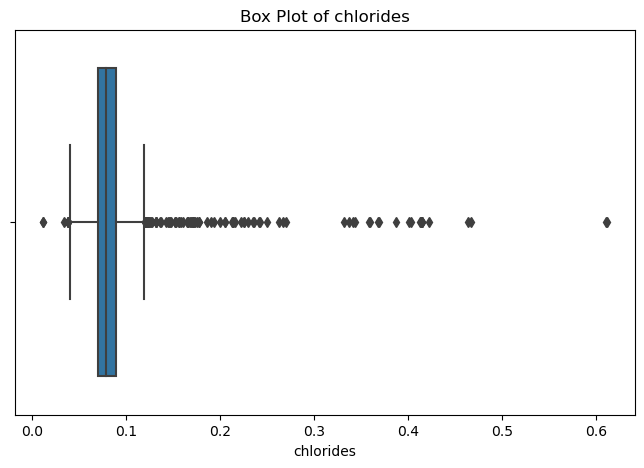

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_wine['chlorides'])
plt.title('Box Plot of chlorides')
plt.xlabel('chlorides')
plt.show()

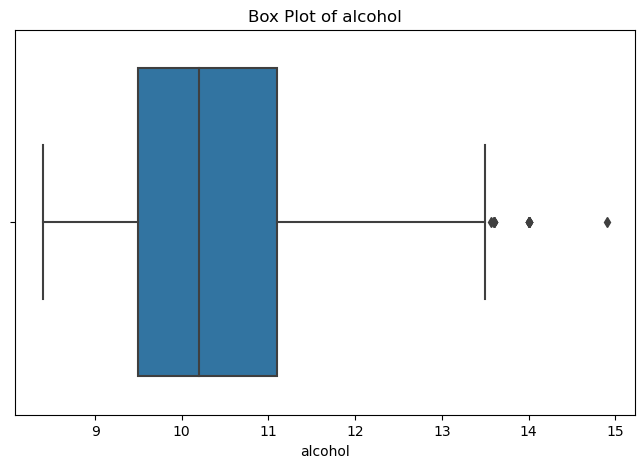

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_wine['alcohol'])
plt.title('Box Plot of alcohol')
plt.xlabel('alcohol')
plt.show()

In [20]:
#there are a lot of outliers in residual sugar and chlorides
#there are no columns to be dropped and no missing rows
#outliers need to be trimmed
#with increase in residual sugar and chlorides the quality seems to be decreasing

## Data Preprocessing

In [13]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
df_wine[['residual sugar','chlorides']]


residual sugar  chlorides
0                1.9      0.076
1                2.6      0.098
2                2.3      0.092
3                1.9      0.075
4                1.9      0.076
...              ...        ...
1594             2.0      0.090
1595             2.2      0.062
1596             2.3      0.076
1597             2.0      0.075
1598             3.6      0.067

[1599 rows x 2 columns]

In [15]:
#removing outliers

Q1 = df_wine[['residual sugar','chlorides']].quantile(0.25)
Q3 = df_wine[['residual sugar','chlorides']].quantile(0.75)
print(Q1,Q3)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

residual sugar    1.90
chlorides         0.07
Name: 0.25, dtype: float64 residual sugar    2.60
chlorides         0.09
Name: 0.75, dtype: float64


In [16]:
df=df_wine[~((df_wine[['residual sugar','chlorides']]<lower_bound)|(df_wine[['residual sugar','chlorides']]>upper_bound)).any(axis=1)]

In [17]:
df_wine.shape

(1599, 12)

<Axes: xlabel='quality'>

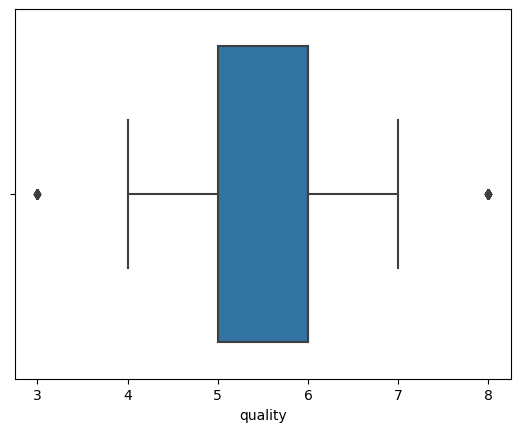

In [20]:
sns.boxplot(x=df_wine['quality'])

In [21]:
X=df.drop('quality',axis=1)
y=df.quality
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [22]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [23]:
X_scaled=pd.DataFrame(X_scaled, columns=X.columns,index=X.index)

In [24]:
X_scaled.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1350.000000       1350.000000  1350.000000     1350.000000   
mean        0.351489          0.333489     0.342222        0.475871   
std         0.160565          0.145344     0.247749        0.165142   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.240385          0.223140     0.120000        0.370370   
50%         0.317308          0.330579     0.320000        0.444444   
75%         0.432692          0.421488     0.533333        0.592593   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1350.000000          1350.000000           1350.000000  1350.000000   
mean      0.477949             0.262705              0.247198     0.575430   
std       0.186906             0.173266              0.193044     0.156360   
min       0.000000             0.000000              0.000000     0.000000   
25%       0.358974             0.125000              0.106918     0.479259   
50%       0.474359             0.232143              0.194969     0.576346   
75%       0.589744             0.357143              0.339623     0.664607   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates      alcohol  
count  1350.000000  1350.000000  1350.000000  
mean      0.400380     0.191367     0.358280  
std       0.131685     0.091805     0.185095  
min       0.000000     0.000000     0.000000  
25%       0.313043     0.133333     0.196429  
50%       0.400000     0.175758     0.303571  
75%       0.478261     0.230303     0.464286  
max       1.000000     1.000000     1.000000

In [25]:
print(X_scaled.isnull().sum())
print(y.isnull().sum())
print(X_scaled.shape)
print(y.shape)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
0
(1350, 11)
(1350,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(1080, 11)
(270, 11)
(1080,)
(270,)


# KNN Regression

In [71]:
# Train the model with different K values and calculate MAPE scores using CV

In [26]:
def find_mape(y,y_pred):
    return np.mean(((np.abs(y-y_pred)/y)))

In [27]:
def test_holdout(k_list,X_train, X_test, y_train, y_test):
    train_mape_scores=[]
    test_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_train_pred = knn.predict(X_train)
        train_mape = find_mape(y_train, y_train_pred)
        train_mape_scores.append(train_mape)
        y_test_pred = knn.predict(X_test)
        test_mape = find_mape(y_test,y_test_pred)
        test_mape_scores.append(test_mape)
    best_k = k_list[np.argmin(test_mape_scores)]
    print("best k with holdout test is {0} and minimum test score is {1}".format(best_k,np.min(test_mape_scores)))
    return best_k,train_mape_scores,test_mape_scores

In [28]:
def cross_validation(X,y):
    cv_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        cv_scores = -cross_val_score(knn,X,y,cv=5,scoring='neg_mean_absolute_percentage_error')
        #print("for k = {}, cv_scores = {}".format(k,cv_scores))
        cv_mape = np.mean(cv_scores)
        cv_mape_scores.append(cv_mape)
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores

In [29]:
# user defined function for Cross Validation 
def custom_cross_validation(X,y,no_of_fold):
    warnings.filterwarnings('ignore', category=UserWarning)
    fold_size=len(X)//no_of_fold
    cv_mape_scores = []
    for k in k_list: 
        knn = KNeighborsRegressor(n_neighbors = k)
        scores = []
        for i in range(no_of_fold):
            start = i * fold_size
            end = (i + 1) * fold_size
            X_test_fold = X[start:end]
            y_test_fold = y[start:end]

            X_train_fold = np.concatenate([X[:start], X[end:]])
            y_train_fold = np.concatenate([y[:start], y[end:]])

            # Fit the model on the training data
            knn.fit(X_train_fold, y_train_fold)

            # Make predictions and calculate a custom score on the test data
            predictions = knn.predict(X_test_fold)
            custom_score = find_mape(predictions, y_test_fold)
            scores.append(custom_score)
        cv_mape_scores.append(np.mean(scores))
    
    # Calculate and return the average score
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with Custom cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores    
        
    

In [33]:
#validate_hold_out(X_train,X_test,y_train,y_test)
k_list=np.arange(1,10,2)
print("Starting test with Hold Out Data")
print("------------------------------------------")
best_k,train_mape_scores,test_mape_scores = test_holdout(k_list,X_train,X_test,y_train,y_test)
print("\n")
print("Starting test Cross-Validation")
print("------------------------------------------")
best_k_CV,cv_mape_scores= cross_validation(X,y)
print("\n")
print("Starting test with Custom Cross-Validation")
print("------------------------------------------")
best_k_CV_custom,cv_mape_scores_custom = custom_cross_validation( X, y, 5)


Starting test with Hold Out Data
------------------------------------------
best k with holdout test is 1 and minimum test score is 0.09318783068783068


Starting test Cross-Validation
------------------------------------------
best k with cross validation is 9 and minimum test score is 0.1071752890456594


Starting test with Custom Cross-Validation
------------------------------------------
best k with Custom cross validation is 9 and minimum test score is 0.10552715634477956


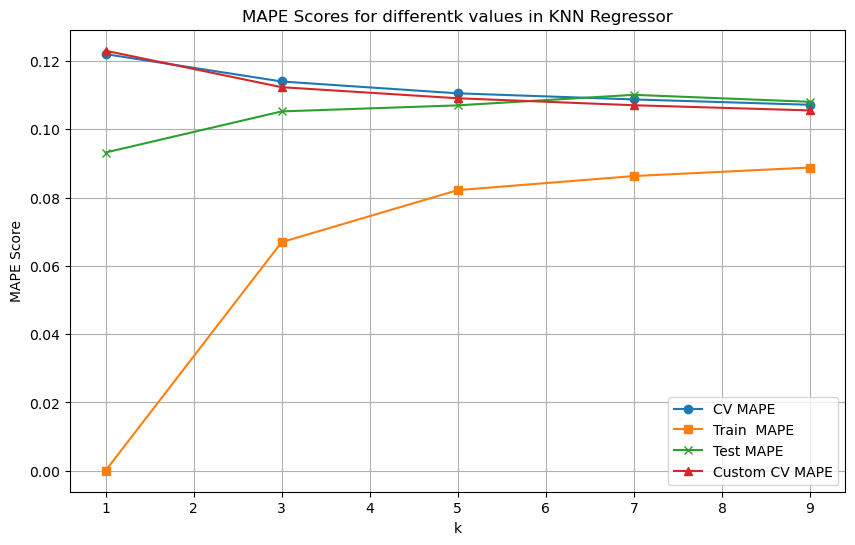

In [34]:
#plot CV MAPE, Train MAPE, Test MAPE for different values of K
plt.figure(figsize=(10,6))
plt.plot(k_list,cv_mape_scores,label='CV MAPE', marker='o')
plt.plot(k_list,train_mape_scores,label='Train  MAPE', marker='s')
plt.plot(k_list,test_mape_scores,label='Test MAPE', marker='x')
plt.plot(k_list,cv_mape_scores_custom,label='Custom CV MAPE', marker='^')
plt.xlabel('k')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for differentk values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()



### CUSTOM IMPLEMENTATION OF KNN

In [78]:
# function to compute euclidean distance
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [79]:
#custom function to implement KNN
def knn(X_train,X_test,y_train,k):
    mape_list = []
    y_pred_list = []
    
    for idx, test_row in X_test.iterrows():        
        distances = []
        for index,row in X_train.iterrows():
            distance = euclidean_distance(test_row,row)
            distances.append([distance,y_train[index]])
        distances.sort(key=lambda x: x[0])
        neighbors=distances[:k]
        target_values = np.take(np.array(neighbors),1,axis=1) #select only corresponding y_train values from nested list
        pred_val=np.mean(target_values)
        y_pred_list.append(pred_val)
    #mape = find_mape(y_test,y_pred_list)
    #mape_list.append(mape)
    
    return y_pred_list

In [ ]:
# Inference:
# - best k with holdout test is 1 
# - best k with cross validation is 9 


In [ ]:
# Data Set 6

# Exploratory Data Analysis

In [2]:
# Step 1: Read the dataset and basic dataframe exploration

In [3]:
df=pd.read_csv("world_real_estate_data(147k).csv")

In [4]:
df.head()

title   country  \
0  2 room apartment 120 m² in Mediterranean Regio...    Turkey   
1              4 room villa 500 m² in Kalkan, Turkey    Turkey   
2          1 room apartment 65 m² in Antalya, Turkey    Turkey   
3             1 room apartment  in Pattaya, Thailand  Thailand   
4             2 room apartment  in Pattaya, Thailand  Thailand   

                                    location  building_construction_year  \
0               Mediterranean Region, Turkey                         NaN   
1  Kalkan, Mediterranean Region, Kas, Turkey                      2021.0   
2      Mediterranean Region, Antalya, Turkey                         NaN   
3      Chon Buri Province, Pattaya, Thailand                      2020.0   
4      Chon Buri Province, Pattaya, Thailand                      2026.0   

   building_total_floors  apartment_floor  apartment_rooms  \
0                    5.0              1.0              3.0   
1                    2.0              NaN              NaN   
2                    5.0              2.0              2.0   
3                   15.0              5.0              2.0   
4                    8.0              3.0              3.0   

   apartment_bedrooms  apartment_bathrooms apartment_total_area  \
0                 2.0                  2.0               120 m²   
1                 NaN                  NaN               500 m²   
2                 1.0                  1.0                65 m²   
3                 1.0                  1.0                  NaN   
4                 2.0                  1.0                  NaN   

  apartment_living_area  price_in_USD  \
0                110 m²      315209.0   
1                480 m²     1108667.0   
2                 60 m²      173211.0   
3                 40 m²       99900.0   
4                 36 m²       67000.0   

                                               image  \
0  https://realting.com/uploads/bigSlider/ab3/888...   
1  https://realting.com/uploads/bigSlider/87b/679...   
2  https://realting.com/uploads/bigSlider/030/a11...   
3  https://realting.com/uploads/bigSlider/e9a/e06...   
4  https://realting.com/uploads/bigSlider/453/aa2...   

                                                 url  
0  https://realting.com/property-for-sale/turkey/...  
1  https://realting.com/property-for-sale/turkey/...  
2  https://realting.com/property-for-sale/turkey/...  
3  https://realting.com/property-for-sale/thailan...  
4  https://realting.com/property-for-sale/thailan...

In [5]:
# there are missing values
# there are categorical and numeric values
# the y label is price_in_USD
# columns title,location,image,url to be dropped

In [6]:
df.shape

(147536, 14)

In [7]:
#there are 147536 observations and 14 variables

In [8]:
df.dtypes

title                          object
country                        object
location                       object
building_construction_year    float64
building_total_floors         float64
apartment_floor               float64
apartment_rooms               float64
apartment_bedrooms            float64
apartment_bathrooms           float64
apartment_total_area           object
apartment_living_area          object
price_in_USD                  float64
image                          object
url                            object
dtype: object

In [9]:
#the datatypes of columns apartment_total_area  has to be converted to float

In [10]:
df['apartment_total_area'] = pd.to_numeric(df['apartment_total_area'].str.replace(' m²', ''), errors='coerce')

In [11]:
df.head()

title   country  \
0  2 room apartment 120 m² in Mediterranean Regio...    Turkey   
1              4 room villa 500 m² in Kalkan, Turkey    Turkey   
2          1 room apartment 65 m² in Antalya, Turkey    Turkey   
3             1 room apartment  in Pattaya, Thailand  Thailand   
4             2 room apartment  in Pattaya, Thailand  Thailand   

                                    location  building_construction_year  \
0               Mediterranean Region, Turkey                         NaN   
1  Kalkan, Mediterranean Region, Kas, Turkey                      2021.0   
2      Mediterranean Region, Antalya, Turkey                         NaN   
3      Chon Buri Province, Pattaya, Thailand                      2020.0   
4      Chon Buri Province, Pattaya, Thailand                      2026.0   

   building_total_floors  apartment_floor  apartment_rooms  \
0                    5.0              1.0              3.0   
1                    2.0              NaN              NaN   
2                    5.0              2.0              2.0   
3                   15.0              5.0              2.0   
4                    8.0              3.0              3.0   

   apartment_bedrooms  apartment_bathrooms  apartment_total_area  \
0                 2.0                  2.0                 120.0   
1                 NaN                  NaN                 500.0   
2                 1.0                  1.0                  65.0   
3                 1.0                  1.0                   NaN   
4                 2.0                  1.0                   NaN   

  apartment_living_area  price_in_USD  \
0                110 m²      315209.0   
1                480 m²     1108667.0   
2                 60 m²      173211.0   
3                 40 m²       99900.0   
4                 36 m²       67000.0   

                                               image  \
0  https://realting.com/uploads/bigSlider/ab3/888...   
1  https://realting.com/uploads/bigSlider/87b/679...   
2  https://realting.com/uploads/bigSlider/030/a11...   
3  https://realting.com/uploads/bigSlider/e9a/e06...   
4  https://realting.com/uploads/bigSlider/453/aa2...   

                                                 url  
0  https://realting.com/property-for-sale/turkey/...  
1  https://realting.com/property-for-sale/turkey/...  
2  https://realting.com/property-for-sale/turkey/...  
3  https://realting.com/property-for-sale/thailan...  
4  https://realting.com/property-for-sale/thailan...

In [12]:
df.dtypes

title                          object
country                        object
location                       object
building_construction_year    float64
building_total_floors         float64
apartment_floor               float64
apartment_rooms               float64
apartment_bedrooms            float64
apartment_bathrooms           float64
apartment_total_area          float64
apartment_living_area          object
price_in_USD                  float64
image                          object
url                            object
dtype: object

In [13]:
#summary statistics of numeric columns

In [14]:
df.describe()

building_construction_year  building_total_floors  apartment_floor  \
count                64719.000000           68224.000000     54592.000000   
mean                  1996.921754               8.575692         5.791709   
std                    157.527635               8.356781         5.541368   
min                      1.000000              -1.000000        -2.000000   
25%                   2004.000000               2.000000         2.000000   
50%                   2021.000000               5.000000         4.000000   
75%                   2024.000000              14.000000         8.000000   
max                   2316.000000             124.000000       202.000000   

       apartment_rooms  apartment_bedrooms  apartment_bathrooms  \
count     74178.000000        36982.000000         55973.000000   
mean          2.572097            2.289222             1.364229   
std           1.319545           18.276913             0.745019   
min          -1.000000           -1.000000             1.000000   
25%           2.000000            1.000000             1.000000   
50%           2.000000            2.000000             1.000000   
75%           3.000000            3.000000             2.000000   
max         124.000000         2009.000000            43.000000   

       apartment_total_area  price_in_USD  
count         140762.000000  1.449610e+05  
mean             127.337953  4.121722e+05  
std              118.293861  8.420984e+05  
min                1.000000  0.000000e+00  
25%               57.000000  1.054200e+05  
50%               88.000000  1.902120e+05  
75%              150.000000  3.989300e+05  
max              998.000000  3.060283e+07

In [15]:
# there are missing values in lots of columns
# there may be outliers in many columns



In [16]:
df.isnull().sum()*100/df.shape[0]

title                          0.000000
country                        0.088114
location                       0.088792
building_construction_year    56.133418
building_total_floors         53.757727
apartment_floor               62.997506
apartment_rooms               49.722102
apartment_bedrooms            74.933576
apartment_bathrooms           62.061463
apartment_total_area           4.591422
apartment_living_area         81.216788
price_in_USD                   1.745337
image                          0.000000
url                            0.000000
dtype: float64

In [17]:
# drop columns apartment_living_area,apartment_bedrooms,apartment_bathroom as they have a lot of null values
# drop the rows with missing values

In [18]:
# Step 3: Value counts of category columns

In [19]:
df.select_dtypes(include='object').columns

Index(['title', 'country', 'location', 'apartment_living_area', 'image',
       'url'],
      dtype='object')

In [20]:
# include one for each column:
df.country.value_counts()

Turkey             25724
Hungary            22325
Russia             18491
Spain              14939
Belarus            14217
Greece             12404
Montenegro         10702
Italy               3335
Georgia             3292
UAE                 2675
Lithuania           2567
Latvia              2295
Thailand            2224
Portugal            2103
Croatia             2032
Uzbekistan          1952
Finland             1751
Czech Republic      1371
Poland              1210
Northern Cyprus      750
United States        414
Austria              237
Armenia              110
Serbia               104
Indonesia            102
Cyprus                79
Australia              1
Name: country, dtype: int64

In [21]:
# since there are lot of sub category for country, countries with lower value count needs to be removed

In [22]:
df['price_in_USD'].groupby([df['country']]).mean()

country
Armenia            2.102339e+05
Australia          5.590000e+05
Austria            4.818492e+05
Belarus            7.185711e+04
Croatia            7.147181e+05
Cyprus             1.955894e+05
Czech Republic     2.751573e+05
Finland            2.231320e+05
Georgia            9.378740e+04
Greece             6.550324e+05
Hungary            2.032099e+05
Indonesia          3.440110e+05
Italy              1.631403e+06
Latvia             5.443125e+05
Lithuania          1.759416e+05
Montenegro         5.171142e+05
Northern Cyprus    1.877211e+05
Poland             3.629315e+05
Portugal           9.649344e+05
Russia             1.924342e+05
Serbia             1.318079e+05
Spain              7.388327e+05
Thailand           2.807266e+05
Turkey             3.772402e+05
UAE                1.308989e+06
United States      1.232923e+06
Uzbekistan         1.127489e+05
Name: price_in_USD, dtype: float64

In [23]:
# Step 4: Data Visualization

In [24]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['price_in_USD'], bins=20, kde=True)
plt.title('Histogram of price in USD')
plt.xlabel('price in USD')
plt.ylabel('Frequency')
plt.show()

In [25]:
# price in USD may have some upper side outliers

In [26]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['apartment_total_area'], bins=20, kde=True)
plt.title('Histogram of apartment total area')
plt.xlabel('apartment total area')
plt.ylabel('Frequency')
plt.show()

In [27]:
# The histogram is right skewed and may have some outliers

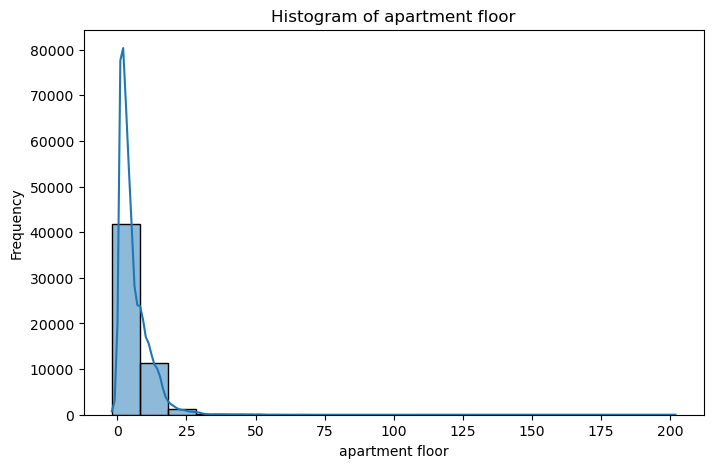

In [28]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['apartment_floor'], bins=20, kde=True)
plt.title('Histogram of apartment floor')
plt.xlabel('apartment floor')
plt.ylabel('Frequency')
plt.show()

In [29]:
# there ara a lot of outliers in apartment floor

In [30]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price_in_USD'])
plt.title('Box Plot of price in USD')
plt.xlabel('price in USD')
plt.show()

In [31]:
# there may be lot of  outliers in price in USD column

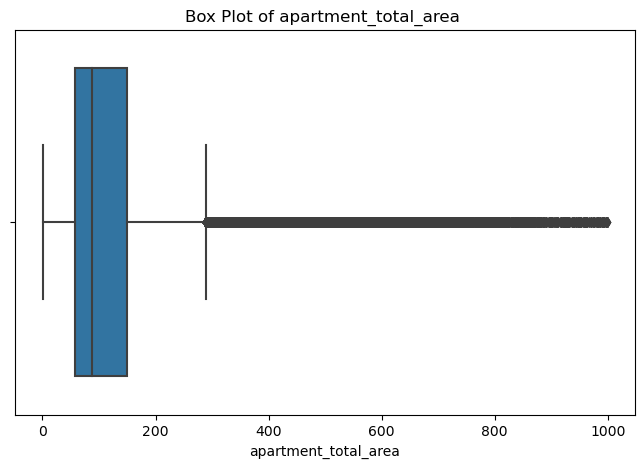

In [32]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['apartment_total_area'])
plt.title('Box Plot of apartment_total_area ')
plt.xlabel('apartment_total_area')
plt.show()

<Axes: xlabel='apartment_total_area', ylabel='price_in_USD'>

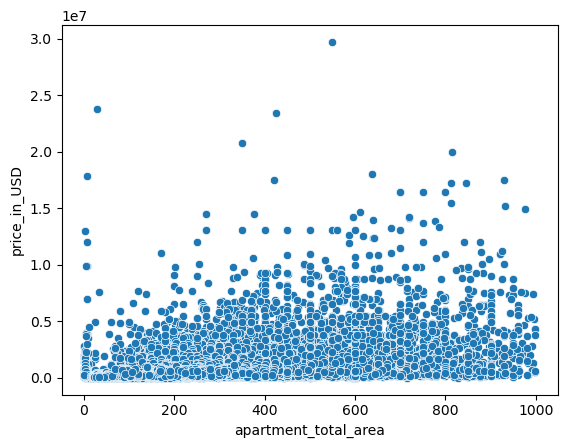

In [33]:
sns.scatterplot(x=df.apartment_total_area, y=df.price_in_USD)

In [34]:
# price_in_USD seems to have increasing with apartment_total_area

<Axes: xlabel='apartment_rooms', ylabel='price_in_USD'>

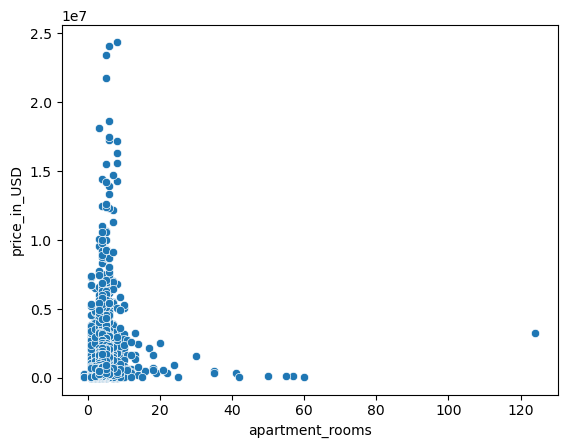

In [35]:
sns.scatterplot(x=df.apartment_rooms, y=df.price_in_USD)

In [36]:
# apartmnet rooms do not seem to have any significant impact on price in USD

<Axes: xlabel='building_construction_year', ylabel='price_in_USD'>

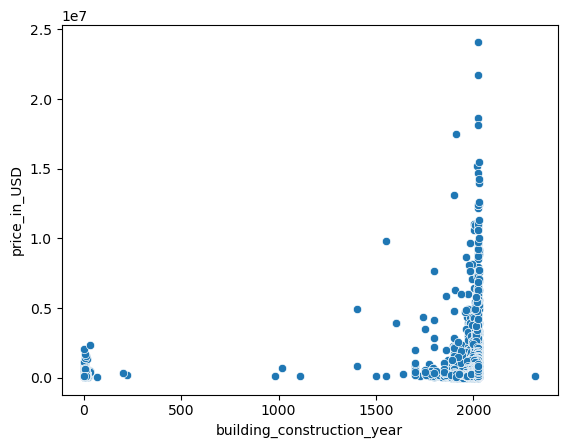

In [37]:
sns.scatterplot(x=df.building_construction_year, y=df.price_in_USD)

In [38]:
# Step 5: Observations from data visualization
# - The columns title,location,image,url,apartment_living_area,apartment_bedrooms,apartment_bathroom are to be dropped
# - Rows with missing values are to be removed
# - Outliers require rows to be trimmed
# - Country is categorical with lots of sub categories. They have to be clustered


# Data Preprocessing

In [39]:
# Step 1: Remove columns:title', 'location','image','url','apartment_living_area','apartment_bedrooms','apartment_bathrooms'
df = df.drop(columns=['title', 'location','image','url','apartment_living_area','apartment_bedrooms','apartment_bathrooms'])

In [40]:
df.shape

(147536, 7)

In [41]:
df = df.dropna()

In [42]:
df.shape

(28891, 7)

In [43]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()


building_construction_year  building_total_floors  apartment_floor  \
6                       2007.0                    2.0              3.0   
15                      2023.0                    4.0              2.0   
23                      1955.0                    4.0              4.0   
26                      2013.0                   16.0              2.0   
73                      2021.0                    6.0              2.0   

    apartment_rooms  apartment_total_area  price_in_USD  
6               5.0                 245.0      274415.0  
15              4.0                  54.0      314990.0  
23              3.0                  72.0      122000.0  
26              3.0                 100.0      159000.0  
73              2.0                  55.0      314122.0

In [44]:
# outlier filter

# get thresholds for outlier
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [45]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [46]:
df.shape

(21074, 7)

<Axes: xlabel='price_in_USD'>

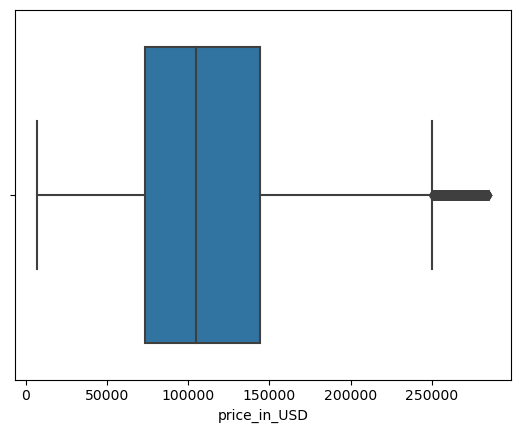

In [47]:
sns.boxplot(x=df['price_in_USD'])

In [48]:
df_num = df.select_dtypes(include='number')
df_num.shape

(21074, 6)

In [49]:
# outlier filter

# get thresholds for outlier
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [50]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [51]:
df.shape

(17404, 7)

<Axes: xlabel='price_in_USD'>

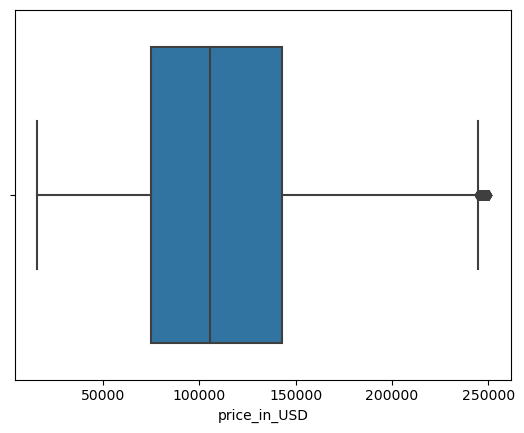

In [52]:
sns.boxplot(x=df['price_in_USD'])

In [53]:
X = df.drop('price_in_USD', axis=1)
y = df.price_in_USD
X.head()

country  building_construction_year  building_total_floors  \
74     Thailand                      2021.0                    8.0   
138  Uzbekistan                      2024.0                    9.0   
146      Turkey                      2020.0                    4.0   
154  Uzbekistan                      2024.0                    7.0   
156  Uzbekistan                      2025.0                   11.0   

     apartment_floor  apartment_rooms  apartment_total_area  
74               1.0              1.0                  23.0  
138              3.0              1.0                  43.0  
146              4.0              3.0                  93.0  
154              4.0              1.0                  43.0  
156              8.0              2.0                  76.0

In [54]:
X_num = X.select_dtypes('number')
X_num.head()

building_construction_year  building_total_floors  apartment_floor  \
74                       2021.0                    8.0              1.0   
138                      2024.0                    9.0              3.0   
146                      2020.0                    4.0              4.0   
154                      2024.0                    7.0              4.0   
156                      2025.0                   11.0              8.0   

     apartment_rooms  apartment_total_area  
74               1.0                  23.0  
138              1.0                  43.0  
146              3.0                  93.0  
154              1.0                  43.0  
156              2.0                  76.0

In [55]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [56]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [57]:
X_num_scaled.describe()

building_construction_year  building_total_floors  apartment_floor  \
count                17404.000000           17404.000000     17404.000000   
mean                     0.620616               0.517783         0.356162   
std                      0.174107               0.197544         0.239153   
min                      0.000000               0.000000         0.000000   
25%                      0.500000               0.423077         0.150000   
50%                      0.700000               0.538462         0.350000   
75%                      0.700000               0.615385         0.550000   
max                      1.000000               1.000000         1.000000   

       apartment_rooms  apartment_total_area  
count     17404.000000          17404.000000  
mean          0.359324              0.362335  
std           0.296906              0.212176  
min           0.000000              0.000000  
25%           0.000000              0.206522  
50%           0.333333              0.358696  
75%           0.666667              0.500000  
max           1.000000              1.000000

In [58]:
X_cat = X.select_dtypes('object')
X_cat.head()

country
74     Thailand
138  Uzbekistan
146      Turkey
154  Uzbekistan
156  Uzbekistan

In [59]:
df.country.value_counts()

Russia             11064
Belarus             2503
Turkey              1687
Georgia              708
Uzbekistan           637
Lithuania            230
Northern Cyprus      185
Thailand             123
Montenegro            60
Greece                60
Croatia               56
UAE                   24
Indonesia             23
Spain                 12
Cyprus                11
Serbia                 9
Poland                 4
Portugal               3
Italy                  3
Czech Republic         2
Name: country, dtype: int64

In [60]:
# clustering countries
# finding percentage of each cuntry's occurence
country_percentages=df.country.value_counts()* 100/ len(df)
country_percentages

Russia             63.571593
Belarus            14.381751
Turkey              9.693174
Georgia             4.068030
Uzbekistan          3.660078
Lithuania           1.321535
Northern Cyprus     1.062974
Thailand            0.706734
Montenegro          0.344748
Greece              0.344748
Croatia             0.321765
UAE                 0.137899
Indonesia           0.132154
Spain               0.068950
Cyprus              0.063204
Serbia              0.051712
Poland              0.022983
Portugal            0.017237
Italy               0.017237
Czech Republic      0.011492
Name: country, dtype: float64

In [61]:
# Filter the DataFrame to include rows where the country occurs more than 3%
df = df[df['country'].isin(country_percentages[country_percentages > 3].index)]

In [62]:
df.country.value_counts()

Russia        11064
Belarus        2503
Turkey         1687
Georgia         708
Uzbekistan      637
Name: country, dtype: int64

In [63]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  

In [64]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [65]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((17404, 25), (17404, 5), (17404, 20))

In [66]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
building_construction_year    0
building_total_floors         0
apartment_floor               0
apartment_rooms               0
apartment_total_area          0
country_Belarus               0
country_Croatia               0
country_Cyprus                0
country_Czech Republic        0
country_Georgia               0
country_Greece                0
country_Indonesia             0
country_Italy                 0
country_Lithuania             0
country_Montenegro            0
country_Northern Cyprus       0
country_Poland                0
country_Portugal              0
country_Russia                0
country_Serbia                0
country_Spain                 0
country_Thailand              0
country_Turkey                0
country_UAE                   0
country_Uzbekistan            0
dtype: int64
0
(17404, 25)
(17404,)


In [67]:
X.describe()

building_construction_year  building_total_floors  apartment_floor  \
count                17404.000000           17404.000000     17404.000000   
mean                     0.620616               0.517783         0.356162   
std                      0.174107               0.197544         0.239153   
min                      0.000000               0.000000         0.000000   
25%                      0.500000               0.423077         0.150000   
50%                      0.700000               0.538462         0.350000   
75%                      0.700000               0.615385         0.550000   
max                      1.000000               1.000000         1.000000   

       apartment_rooms  apartment_total_area  country_Belarus  \
count     17404.000000          17404.000000     17404.000000   
mean          0.359324              0.362335         0.143818   
std           0.296906              0.212176         0.350915   
min           0.000000              0.000000         0.000000   
25%           0.000000              0.206522         0.000000   
50%           0.333333              0.358696         0.000000   
75%           0.666667              0.500000         0.000000   
max           1.000000              1.000000         1.000000   

       country_Croatia  country_Cyprus  country_Czech Republic  \
count     17404.000000    17404.000000            17404.000000   
mean          0.003218        0.000632                0.000115   
std           0.056635        0.025133                0.010720   
min           0.000000        0.000000                0.000000   
25%           0.000000        0.000000                0.000000   
50%           0.000000        0.000000                0.000000   
75%           0.000000        0.000000                0.000000   
max           1.000000        1.000000                1.000000   

       country_Georgia  ...  country_Northern Cyprus  country_Poland  \
count     17404.000000  ...             17404.000000    17404.000000   
mean          0.040680  ...                 0.010630        0.000230   
std           0.197554  ...                 0.102554        0.015159   
min           0.000000  ...                 0.000000        0.000000   
25%           0.000000  ...                 0.000000        0.000000   
50%           0.000000  ...                 0.000000        0.000000   
75%           0.000000  ...                 0.000000        0.000000   
max           1.000000  ...                 1.000000        1.000000   

       country_Portugal  country_Russia  country_Serbia  country_Spain  \
count      17404.000000    17404.000000    17404.000000   17404.000000   
mean           0.000172        0.635716        0.000517       0.000689   
std            0.013128        0.481243        0.022735       0.026250   
min            0.000000        0.000000        0.000000       0.000000   
25%            0.000000        0.000000        0.000000       0.000000   
50%            0.000000        1.000000        0.000000       0.000000   
75%            0.000000        1.000000        0.000000       0.000000   
max            1.000000        1.000000        1.000000       1.000000   

       country_Thailand  country_Turkey   country_UAE  country_Uzbekistan  
count      17404.000000    17404.000000  17404.000000        17404.000000  
mean           0.007067        0.096932      0.001379            0.036601  
std            0.083772        0.295873      0.037110            0.187785  
min            0.000000        0.000000      0.000000            0.000000  
25%            0.000000        0.000000      0.000000            0.000000  
50%            0.000000        0.000000      0.000000            0.000000  
75%            0.000000        0.000000      0.000000            0.000000  
max            1.000000        1.000000      1.000000            1.000000  

[8 rows x 25 columns]

In [68]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(13923, 25)
(3481, 25)
(13923,)
(3481,)


In [70]:
# Step 9: Observations after preprocessing
# - 'title', 'location','image','url','apartment_living_area','apartment_bedrooms','apartment_bathrooms' are removed
# - sub categories in country has been clustered to group and countries with data less than 3% has been removed
# - missing rows are removed
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

# KNN Regression

In [71]:
# Train the model with different K values and calculate MAPE scores using CV

In [72]:
def find_mape(y,y_pred):
    return np.mean(((np.abs(y-y_pred)/y)))

In [73]:
def test_holdout(k_list,X_train, X_test, y_train, y_test):
    train_mape_scores=[]
    test_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_train_pred = knn.predict(X_train)
        train_mape = find_mape(y_train, y_train_pred)
        train_mape_scores.append(train_mape)
        y_test_pred = knn.predict(X_test)
        test_mape = find_mape(y_test,y_test_pred)
        test_mape_scores.append(test_mape)
    best_k = k_list[np.argmin(test_mape_scores)]
    print("best k with holdout test is {0} and minimum test score is {1}".format(best_k,np.min(test_mape_scores)))
    return best_k,train_mape_scores,test_mape_scores

In [74]:
def cross_validation(X,y):
    cv_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        cv_scores = -cross_val_score(knn,X,y,cv=5,scoring='neg_mean_absolute_percentage_error')
        #print("for k = {}, cv_scores = {}".format(k,cv_scores))
        cv_mape = np.mean(cv_scores)
        cv_mape_scores.append(cv_mape)
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores

In [75]:
# user defined function for Cross Validation 
def custom_cross_validation(X,y,no_of_fold):
    warnings.filterwarnings('ignore', category=UserWarning)
    fold_size=len(X)//no_of_fold
    cv_mape_scores = []
    for k in k_list: 
        knn = KNeighborsRegressor(n_neighbors = k)
        scores = []
        for i in range(no_of_fold):
            start = i * fold_size
            end = (i + 1) * fold_size
            X_test_fold = X[start:end]
            y_test_fold = y[start:end]

            X_train_fold = np.concatenate([X[:start], X[end:]])
            y_train_fold = np.concatenate([y[:start], y[end:]])

            # Fit the model on the training data
            knn.fit(X_train_fold, y_train_fold)

            # Make predictions and calculate a custom score on the test data
            predictions = knn.predict(X_test_fold)
            custom_score = find_mape(predictions, y_test_fold)
            scores.append(custom_score)
        cv_mape_scores.append(np.mean(scores))
    
    # Calculate and return the average score
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with Custom cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores    
        
    

In [76]:
#validate_hold_out(X_train,X_test,y_train,y_test)
k_list=np.arange(1,10,2)
print("Starting test with Hold Out Data")
print("------------------------------------------")
best_k,train_mape_scores,test_mape_scores = test_holdout(k_list,X_train,X_test,y_train,y_test)
print("\n")
print("Starting test Cross-Validation")
print("------------------------------------------")
best_k_CV,cv_mape_scores= cross_validation(X,y)
print("\n")
print("Starting test with Custom Cross-Validation")
print("------------------------------------------")
best_k_CV_custom,cv_mape_scores_custom = custom_cross_validation( X, y, 5)


Starting test with Hold Out Data
------------------------------------------
best k with holdout test is 5 and minimum test score is 0.12281876779365972


Starting test Cross-Validation
------------------------------------------
best k with cross validation is 5 and minimum test score is 0.2256758549057985


Starting test with Custom Cross-Validation
------------------------------------------
best k with Custom cross validation is 3 and minimum test score is 0.18896628967076248


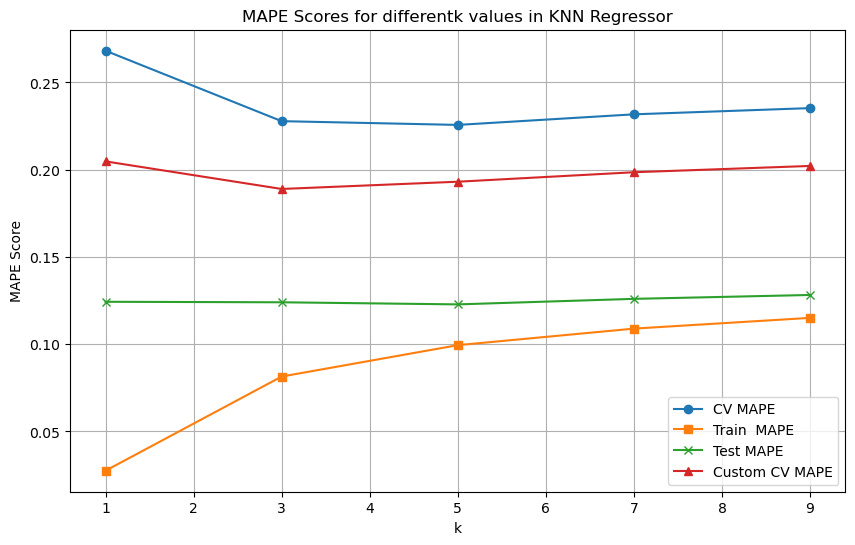

In [77]:
#plot CV MAPE, Train MAPE, Test MAPE for different values of K
plt.figure(figsize=(10,6))
plt.plot(k_list,cv_mape_scores,label='CV MAPE', marker='o')
plt.plot(k_list,train_mape_scores,label='Train  MAPE', marker='s')
plt.plot(k_list,test_mape_scores,label='Test MAPE', marker='x')
plt.plot(k_list,cv_mape_scores_custom,label='Custom CV MAPE', marker='^')
plt.xlabel('k')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for differentk values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()



### CUSTOM IMPLEMENTATION OF KNN

In [78]:
# function to compute euclidean distance
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [79]:
#custom function to implement KNN
def knn(X_train,X_test,y_train,k):
    mape_list = []
    y_pred_list = []
    
    for idx, test_row in X_test.iterrows():        
        distances = []
        for index,row in X_train.iterrows():
            distance = euclidean_distance(test_row,row)
            distances.append([distance,y_train[index]])
        distances.sort(key=lambda x: x[0])
        neighbors=distances[:k]
        target_values = np.take(np.array(neighbors),1,axis=1) #select only corresponding y_train values from nested list
        pred_val=np.mean(target_values)
        y_pred_list.append(pred_val)
    #mape = find_mape(y_test,y_pred_list)
    #mape_list.append(mape)
    
    return y_pred_list

In [ ]:
# Inference:
# - best k with holdout test is 5 
# - best k with cross validation is 5 
